<a href="https://colab.research.google.com/github/csantanaes/analisedadostwitter/blob/main/EARTE_Analise_Twitter_julho_2021_26072021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Projeto Analise de dados Twitter hastag #earte - Ensino remoto emergencial UFES - Pandemia

# 1.1 Montando e acessando Drive  

**Montagem do Drive **

In [101]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#montagem do Drive no Colab 
from google.colab import drive
import datetime 
drive.mount('/content/drive')
tempo = datetime.datetime.now()
print('Drive montado  ', tempo)

In [ ]:
#import CSV to Colab

url = 'copied_raw_github_link'
df = pd.read_csv(url)

In [102]:
# IMPORTANDO CSV para Colab 
import pandas as pd
#df = pd.read_csv('/content/drive/MyDrive/DATA/tweets_EARTE_hydrated.csv')
#df = pd.read_csv('/content/gdrive/MyDrive/DATA/EARTE/earte29062021.csv')
df = pd.read_csv('/content/gdrive/MyDrive/DATA/ensinoremoto16072021.csv')
#mostra 5 primeiros registros do dataframe
df.head()
# 

id                created_at  ... __twarc.version Unnamed: 91
0  1416145479939805191  2021-07-16T21:19:27.000Z  ...           2.3.7         NaN
1  1415925194321969155  2021-07-16T06:44:07.000Z  ...           2.3.7         NaN
2  1415123734671810561  2021-07-14T01:39:24.000Z  ...           2.3.7         NaN
3  1415873994637598722  2021-07-16T03:20:40.000Z  ...           2.3.7         NaN
4  1415059480149204996  2021-07-13T21:24:05.000Z  ...           2.3.7         NaN

[5 rows x 92 columns]

In [ ]:
df.shape #Quantidade de linhas e colunas do DataFrame

(3060, 92)

In [ ]:
df.index #Descrição do Index

RangeIndex(start=0, stop=3060, step=1)

In [ ]:
df.columns #Colunas presentes no DataFrame

Index(['id', 'created_at', 'text', 'attachments.media',
       'attachments.media_keys', 'attachments.poll.duration_minutes',
       'attachments.poll.end_datetime', 'attachments.poll.id',
       'attachments.poll.options', 'attachments.poll.voting_status',
       'attachments.poll_ids', 'author.id', 'author.created_at',
       'author.username', 'author.name', 'author.description',
       'author.entities.description.cashtags',
       'author.entities.description.hashtags',
       'author.entities.description.mentions',
       'author.entities.description.urls', 'author.entities.url.urls',
       'author.location', 'author.pinned_tweet_id', 'author.profile_image_url',
       'author.protected', 'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.listed_count',
       'author.public_metrics.tweet_count', 'author.url', 'author.verified',
       'author.withheld.scope', 'author.withheld.copyright',
       'author.withheld

In [ ]:
df.count() #Contagem de dados não-nulos

In [ ]:
#https://paulovasconcellos.com.br/28-comandos-%C3%BAteis-de-pandas-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-6ab64beefa93

In [ ]:
df['text']

0       A Comissão de Acompanhamento ao Trabalho/Ensin...
1       Zoom e outras reuniões pela Internet l"Se você...
2       Ensino remoto tá puxado pra todo mundo, né?\nT...
3       RT @ericbrasiln: Ensino remoto tá puxado pra t...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    RT @marinhos: Ensino remoto. Mas o que importa...
3056    Ensino remoto. Improvisação, não inovação educ...
3057    A ironia provocada pelo novo coronavírus.\nNa ...
3058    En una semana todos los docentes trabajando te...
3059    É a verdade, incomode a quem incomodar.\nEs la...
Name: text, Length: 3060, dtype: object

In [ ]:
#Removendo  caracteres chineses do dataframe
df['text'] = df['text'].astype(str)
#df.text.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
#data = re.sub("([^\x00-\x7F])+"," ",df.text)
import re
def replace_foreign_characters(s):
    return re.sub(r'[^\x00-\x7f]',r'', s)

df['text'] = df['text'].apply(lambda x: replace_foreign_characters(x))

In [ ]:
df['text']

0       A Comisso de Acompanhamento ao Trabalho/Ensino...
1       Zoom e outras reunies pela Internet l"Se voc p...
2       Ensino remoto t puxado pra todo mundo, n?\nTen...
3       RT @ericbrasiln: Ensino remoto t puxado pra to...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    RT @marinhos: Ensino remoto. Mas o que importa...
3056    Ensino remoto. Improvisao, no inovao educacion...
3057    A ironia provocada pelo novo coronavrus.\nNa E...
3058    En una semana todos los docentes trabajando te...
3059     a verdade, incomode a quem incomodar.\nEs la ...
Name: text, Length: 3060, dtype: object

In [ ]:
df['text'] = df['text'].str.replace(r'[^\x00-\x7F]+', '')

In [ ]:
df['text']

0       A Comisso de Acompanhamento ao Trabalho/Ensino...
1       Zoom e outras reunies pela Internet l"Se voc p...
2       Ensino remoto t puxado pra todo mundo, n?\nTen...
3       RT @ericbrasiln: Ensino remoto t puxado pra to...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    RT @marinhos: Ensino remoto. Mas o que importa...
3056    Ensino remoto. Improvisao, no inovao educacion...
3057    A ironia provocada pelo novo coronavrus.\nNa E...
3058    En una semana todos los docentes trabajando te...
3059     a verdade, incomode a quem incomodar.\nEs la ...
Name: text, Length: 3060, dtype: object

In [ ]:
df[:100]

id                created_at  ... __twarc.version Unnamed: 91
0   1416145479939805191  2021-07-16T21:19:27.000Z  ...           2.3.7         NaN
1   1415925194321969155  2021-07-16T06:44:07.000Z  ...           2.3.7         NaN
2   1415123734671810561  2021-07-14T01:39:24.000Z  ...           2.3.7         NaN
3   1415873994637598722  2021-07-16T03:20:40.000Z  ...           2.3.7         NaN
4   1415059480149204996  2021-07-13T21:24:05.000Z  ...           2.3.7         NaN
..                  ...                       ...  ...             ...         ...
95  1415355590407331846  2021-07-14T17:00:43.000Z  ...           2.3.7         NaN
96  1415354921185054731  2021-07-14T16:58:03.000Z  ...           2.3.7         NaN
97  1415353491099463686  2021-07-14T16:52:22.000Z  ...           2.3.7         NaN
98  1415353450389544970  2021-07-14T16:52:13.000Z  ...           2.3.7         NaN
99  1415353217408544772  2021-07-14T16:51:17.000Z  ...           2.3.7         NaN

[100 rows x 92 columns]

In [ ]:
df.shape

(3060, 92)

In [ ]:
df.head(10).isna().sum()

id                         0
created_at                 0
text                       0
attachments.media          9
attachments.media_keys     9
                          ..
withheld.country_codes    10
__twarc.retrieved_at       0
__twarc.url                0
__twarc.version            0
Unnamed: 91               10
Length: 92, dtype: int64

In [ ]:
en_list = re.findall(u'[^\u4E00-\u9FA5\u3000-\u303F]', str(df.text))

In [ ]:
df['text']

0       A Comisso de Acompanhamento ao Trabalho/Ensino...
1       Zoom e outras reunies pela Internet l"Se voc p...
2       Ensino remoto t puxado pra todo mundo, n?\nTen...
3       RT @ericbrasiln: Ensino remoto t puxado pra to...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    RT @marinhos: Ensino remoto. Mas o que importa...
3056    Ensino remoto. Improvisao, no inovao educacion...
3057    A ironia provocada pelo novo coronavrus.\nNa E...
3058    En una semana todos los docentes trabajando te...
3059     a verdade, incomode a quem incomodar.\nEs la ...
Name: text, Length: 3060, dtype: object

In [ ]:
# The unicode accounts for chinese characters and punctuations

import re

def strip_chinese_words(string):
    # list of english words
    en_list = re.findall(u'[^\u4E00-\u9FA5\u3000-\u303F]', str(string))
    
    # Remove word from the list, if not english
    for c in string:
        if c not in en_list:
            string = string.replace(c, '')
    return string
# Apply strip_chinese_words(...) on the column 'text'
df['text'] = df['text'].apply(lambda x: strip_chinese_words(x))
df.head()

id                created_at  ... __twarc.version Unnamed: 91
0  1409983099652378626  2021-06-29T21:12:21.000Z  ...           2.3.1         NaN
1  1410014272776654852  2021-06-29T23:16:14.000Z  ...           2.3.1         NaN
2  1409985343135404039  2021-06-29T21:21:16.000Z  ...           2.3.1         NaN
3  1409985975401517058  2021-06-29T21:23:47.000Z  ...           2.3.1         NaN
4  1409961906606153737  2021-06-29T19:48:09.000Z  ...           2.3.1         NaN

[5 rows x 92 columns]

In [ ]:
df.head()

id                created_at  ... __twarc.version Unnamed: 91
0  1416145479939805191  2021-07-16T21:19:27.000Z  ...           2.3.7         NaN
1  1415925194321969155  2021-07-16T06:44:07.000Z  ...           2.3.7         NaN
2  1415123734671810561  2021-07-14T01:39:24.000Z  ...           2.3.7         NaN
3  1415873994637598722  2021-07-16T03:20:40.000Z  ...           2.3.7         NaN
4  1415059480149204996  2021-07-13T21:24:05.000Z  ...           2.3.7         NaN

[5 rows x 92 columns]

In [ ]:
df.shape

(3060, 92)

In [ ]:
#comando para limpar dataframe pelo author.username
df.drop(df.loc[df['author.username'] == '6U0w0U9'].index, inplace=True)

In [ ]:
df.shape

(23249, 92)

# 2.0 - Coletando informações sobre o dataframe importado

# 2.1 Tipo de dado do dataframe

In [ ]:
df.text.head(50)

0     A Comisso de Acompanhamento ao Trabalho/Ensino...
1     Zoom e outras reunies pela Internet l"Se voc p...
2     Ensino remoto t puxado pra todo mundo, n?\nTen...
3     RT @ericbrasiln: Ensino remoto t puxado pra to...
4     Diante dos desafios do nosso tempo, os educado...
5     RT @Oi_Futuro: Diante dos desafios do nosso te...
6     RT @Oi_Futuro: Diante dos desafios do nosso te...
7     RT @ericbrasiln: Ensino remoto t puxado pra to...
8     Divulgar um canal educativo nunca  demais!!!\n...
9     RT @quelliassis: Divulgar um canal educativo n...
10    RT @ericbrasiln: Ensino remoto t puxado pra to...
11    RT @Oi_Futuro: Diante dos desafios do nosso te...
12    No vdeo de hoje, a Andressa vai mostrar um jog...
13    Abra uma nova aba, acesse  https://t.co/VmoCBw...
14    RT @ericbrasiln: Ensino remoto t puxado pra to...
15    RT @ericbrasiln: Ensino remoto t puxado pra to...
16    O ensino remoto dos pobres. \nThe remote teach...
17    RT @Oi_Futuro: Diante dos desafios do noss

In [ ]:
df.shape

(3060, 92)

In [ ]:
type(df)

pandas.core.frame.DataFrame

2.2 Informações sobre campos do dataframe

In [ ]:
#informações e campos do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 92 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               3060 non-null   int64  
 1   created_at                                       3054 non-null   object 
 2   text                                             3060 non-null   object 
 3   attachments.media                                995 non-null    object 
 4   attachments.media_keys                           995 non-null    object 
 5   attachments.poll.duration_minutes                4 non-null      float64
 6   attachments.poll.end_datetime                    4 non-null      object 
 7   attachments.poll.id                              4 non-null      float64
 8   attachments.poll.options                         4 non-null      object 
 9   attachments.poll.voting_status

In [ ]:
# number of rows - number of duplicates:
df.shape[0] - df['author.name'].duplicated().sum()

1564

In [ ]:
print('Numero de colunas do dataframe : ', len(df.columns))
print('Numero de linhas do dataframe : ', len(df.index))

Numero de colunas do dataframe :  92
Numero de linhas do dataframe :  3060


In [ ]:
#mostrar todas linhas do dataframe
import pandas 
pandas.set_option('display.max_rows', df.shape[0]+1)
print(df)

In [ ]:
# Drop irrelevant columns
df = df.drop(df.columns[[13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]], axis=1)

In [ ]:
df['author.name'].value_counts().head(10)

Instituto de Desenho Instrucional                     85
Canal Atualidade em Foco #ForaBolsonaro               84
IFS Campus Aracaju                                    77
Fundação Lemann                                       69
jose claudio henrich                                  60
Ead Wyden Araçatuba                                   56
Marinhos vacinado (2 doses) e mascarado (N95/PFF2)    46
Metha - Metodologias de Ensino em Ciências Humanas    41
Demétrio Weber                                        36
Uesb                                                  29
Name: author.name, dtype: int64

In [ ]:
df['author.name'].value_counts().cumsum().head(10)

# https://www.kaggle.com/eliasdabbas/twitter-in-a-dataframe 

Instituto de Desenho Instrucional                      85
Canal Atualidade em Foco #ForaBolsonaro               169
IFS Campus Aracaju                                    246
Fundação Lemann                                       315
jose claudio henrich                                  375
Ead Wyden Araçatuba                                   431
Marinhos vacinado (2 doses) e mascarado (N95/PFF2)    477
Metha - Metodologias de Ensino em Ciências Humanas    518
Demétrio Weber                                        554
Uesb                                                  583
Name: author.name, dtype: int64

In [ ]:
# pesquisa regex = count 
df.filter(regex='count', axis=1).head() # user ID and tweet ID are integers but not 'numeric' in this sense

author.public_metrics.followers_count  ...  withheld.country_codes
0                                   59.0  ...                     NaN
1                                   37.0  ...                     NaN
2                                35022.0  ...                     NaN
3                                  316.0  ...                     NaN
4                                  390.0  ...                     NaN

[5 rows x 17 columns]

In [ ]:
#How many people don't have a description?
df['author.description'].isna().sum()

221

# 3.0 - Processo de limpeza do dataset


In [ ]:
df.text.count()

3060

In [ ]:
# Removendo os valores duplicados:
df.drop_duplicates(['text'], inplace=True)

In [ ]:
#Linhas apos a linha de valores duplicados 
df.text.count()

2326

In [ ]:
df.text

0       A Comisso de Acompanhamento ao Trabalho/Ensino...
1       Zoom e outras reunies pela Internet l"Se voc p...
2       Ensino remoto t puxado pra todo mundo, n?\nTen...
3       RT @ericbrasiln: Ensino remoto t puxado pra to...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    RT @marinhos: Ensino remoto. Mas o que importa...
3056    Ensino remoto. Improvisao, no inovao educacion...
3057    A ironia provocada pelo novo coronavrus.\nNa E...
3058    En una semana todos los docentes trabajando te...
3059     a verdade, incomode a quem incomodar.\nEs la ...
Name: text, Length: 2326, dtype: object

In [ ]:
# Função para remover Stopwords da nossa base:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [ ]:
# Aplicando o stemming em nossa base:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [ ]:
def Limpeza_dados(instancia):
    # remove links, pontos, virgulas,ponto e virgulas dos tweets
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def Lemmatization(instancia):
  palavras = []
  for w in instancia.split():
    palavras.append(wordnet_lemmatizer.lemmatize(w))
  return (" ".join(palavras))

In [ ]:
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [ ]:
# Aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in df.text]
# https://minerandodados.com.br/analise-de-sentimentos-utilizando-dados-do-twitter/

In [ ]:
#creates a function to remove all @'s, hashtags, and links
#Then applies it to the dataframe
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt) 
    #removes stop words
    txt = re.sub(r'the', '', txt)
    txt = re.sub(r'and', '', txt)
    txt = re.sub(r'to', '', txt)
    return txt
df['text'] = df['text'].apply(cleanUpTweet)

In [ ]:
df.text

0       A Comisso de Acompanhamen ao Trabalho/Ensino R...
1       Zoom e outras reunies pela Internet l"Se voc p...
2       Ensino remo t puxado pra do mundo, n?\nTenho t...
3       Ensino remo t puxado pra do mundo, n?\nTenho t...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    Ensino remo. Mas o que importa mesmo  o recess...
3056    Ensino remo. Improvisao, no inovao educacional...
3057    A ironia provocada pelo novo coronavrus.\nNa E...
3058    En una semana dos los docentes trabajo telemti...
3059     a verdade, incomode a quem incomodar.\nEs la ...
Name: text, Length: 2326, dtype: object

In [ ]:
df['text_new'] = df['text'].apply(cleanUpTweet)

# aqui deveria entrar uma opção de salvar o CSV com o novo campo

In [ ]:
#Filtrar dataframe 2 colunas

df[['text', 'text_new',]]

text                                           text_new
0     A Comisso de Acompanhamen ao Trabalho/Ensino R...  A Comisso de Acompanhamen ao Trabalho/Ensino R...
1     Zoom e outras reunies pela Internet l"Se voc p...  Zoom e outras reunies pela Internet l"Se voc p...
2     Ensino remo t puxado pra do mundo, n?\nTenho t...  Ensino remo t puxado pra do mundo, n?\nTenho t...
3     Ensino remo t puxado pra do mundo, n?\nTenho t...  Ensino remo t puxado pra do mundo, n?\nTenho t...
4     Diante dos desafios do nosso tempo, os educado...  Diante dos desafios do nosso tempo, os educado...
...                                                 ...                                                ...
3055  Ensino remo. Mas o que importa mesmo  o recess...  Ensino remo. Mas o que importa mesmo  o recess...
3056  Ensino remo. Improvisao, no inovao educacional...  Ensino remo. Improvisao, no inovao educacional...
3057  A ironia provocada pelo novo coronavrus.\nNa E...  A ironia provocada pelo novo coronavrus.\nNa E...
3058  En una semana dos los docentes trabajo telemti...  En una semana dos los docentes trabajo telemti...
3059   a verdade, incomode a quem incomodar.\nEs la ...   a verdade, incomode a quem incomodar.\nEs la ...

[2326 rows x 2 columns]

#limpeza hastagh

In [ ]:
import re
df['hashtag'] = df['text'].apply(lambda x: re.findall(r'\B#\w*[a-zA-Z]+\w*', x)) #creating a new column

In [ ]:
df[['text','hashtag']]

text hashtag
0     A Comisso de Acompanhamen ao Trabalho/Ensino R...      []
1     Zoom e outras reunies pela Internet l"Se voc p...      []
2     Ensino remo t puxado pra do mundo, n?\nTenho t...      []
3     Ensino remo t puxado pra do mundo, n?\nTenho t...      []
4     Diante dos desafios do nosso tempo, os educado...      []
...                                                 ...     ...
3055  Ensino remo. Mas o que importa mesmo  o recess...      []
3056  Ensino remo. Improvisao, no inovao educacional...      []
3057  A ironia provocada pelo novo coronavrus.\nNa E...      []
3058  En una semana dos los docentes trabajo telemti...      []
3059   a verdade, incomode a quem incomodar.\nEs la ...      []

[2326 rows x 2 columns]

In [ ]:
1 - x 

In [ ]:
# Gráfico de hastags 
from matplotlib import font_manager as fm, rcParams
import matplotlib as plt
#plt.rcParams["font.serif"] = "cmr10"
#plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
#plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually
df['hashtags'].value_counts()[:20].plot(kind='bar');

KeyError: ignored

In [ ]:
df.head()

id                created_at  ... __twarc.version Unnamed: 91
0  1410053713998254088  2021-06-30T01:52:57.000Z  ...           2.3.1         NaN
1  1409983099652378626  2021-06-29T21:12:21.000Z  ...           2.3.1         NaN
2  1410014272776654852  2021-06-29T23:16:14.000Z  ...           2.3.1         NaN
3  1409985343135404039  2021-06-29T21:21:16.000Z  ...           2.3.1         NaN
4  1409985975401517058  2021-06-29T21:23:47.000Z  ...           2.3.1         NaN

[5 rows x 92 columns]

In [ ]:
df1 = df.text.str.extractall(r'(\#\w+)')[0].value_counts()

In [ ]:
df1

Series([], Name: 0, dtype: int64)

In [ ]:
import pandas as pd
dfhashtags = df1.to_frame()


In [ ]:
type(df1)

pandas.core.series.Series

In [ ]:


type(dfhashtags)

pandas.core.frame.DataFrame

In [ ]:
dfhashtags.head()

Empty DataFrame
Columns: [0]
Index: []

In [ ]:
dfhashtags.info()



<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       0 non-null      int64
dtypes: int64(1)
memory usage: 0.0+ bytes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 92 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               3060 non-null   int64  
 1   created_at                                       3054 non-null   object 
 2   text                                             3054 non-null   object 
 3   attachments.media                                995 non-null    object 
 4   attachments.media_keys                           995 non-null    object 
 5   attachments.poll.duration_minutes                4 non-null      float64
 6   attachments.poll.end_datetime                    4 non-null      object 
 7   attachments.poll.id                              4 non-null      float64
 8   attachments.poll.options                         4 non-null      object 
 9   attachments.poll.voting_status

# Top 10 hashtags e 10 top words

In [ ]:
#https://github.com/cnstlungu/incubator/blob/master/Python/Exploring%20Twitter%20Data%20using%20Python/Exploring%20Twitter%20Data%20using%20Python%20.ipynb


In [103]:
df['text'] = df['text'].apply(str)

In [104]:
import re

hashtags = df['text'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame()\
                     .reset_index()\
                     .sort_values(by=0,ascending=False)
hashtags.columns = ['hashtag','occurences']

In [105]:
hashtags.head(10)

hashtag  occurences
829         #ensinoremoto      1881.0
634                  #ead       400.0
698             #educação       261.0
654             #educacao       171.0
128         #aprendizagem       132.0
788     #ensinoadistancia       128.0
700   #educaçãoadistancia       121.0
808        #ensinohibrido       121.0
1517            #pandemia       117.0
787               #ensino       111.0

Text(0.5, 0.98, 'Top 20 Hashtags')

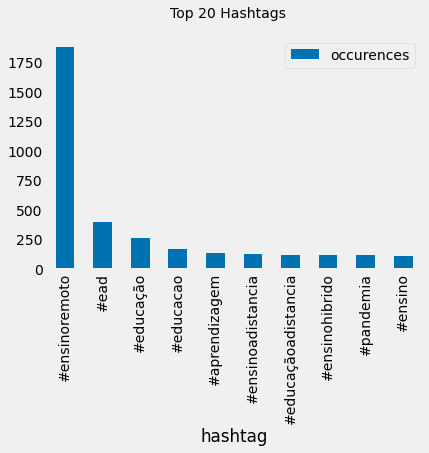

In [114]:
import matplotlib.pyplot as plt

hashtags[:10].plot(kind='bar',y='occurences',x='hashtag')
#fig, ax = plt.subplots(figsize=(12, 8))
#plt.tight_layout()
plt.grid(False)
plt.suptitle('Top 20 Hashtags', fontsize=14)


In [ ]:

df['text'].head(n=10)

0    A Comissão de Acompanhamento ao Trabalho/Ensin...
1    Zoom e outras reuniões pela Internet l"Se você...
2    Ensino remoto tá puxado pra todo mundo, né?\nT...
3    RT @ericbrasiln: Ensino remoto tá puxado pra t...
4    Diante dos desafios do nosso tempo, os educado...
5    RT @Oi_Futuro: Diante dos desafios do nosso te...
6    RT @Oi_Futuro: Diante dos desafios do nosso te...
7    RT @ericbrasiln: Ensino remoto tá puxado pra t...
8    Divulgar um canal educativo nunca é demais!!!\...
9    RT @quelliassis: Divulgar um canal educativo n...
Name: text, dtype: object

In [ ]:
#Top Words

import re
words = df['text'].dropna()\
                            .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']


In [ ]:
words.head(10)

word  occurences
1    a      24056.0
4    n      20846.0
0    e      20618.0
3    s      20277.0
2    t      17409.0
8    o      15949.0
5    r      14416.0
11   i      13257.0
18   d      13071.0
13   c      10679.0

In [ ]:
import nltk
from nltk import bigrams
bigramseries = pd.Series([word for sublist in df['text'].dropna()\
                    .apply(lambda x: [i for i in bigrams(x)])\
                    .tolist() for word in sublist])\
                    .value_counts()

In [ ]:
bigramseries.head()

(o,  )    15114
(a,  )    10130
( , #)     8788
(e,  )     8502
(s,  )     8237
dtype: int64

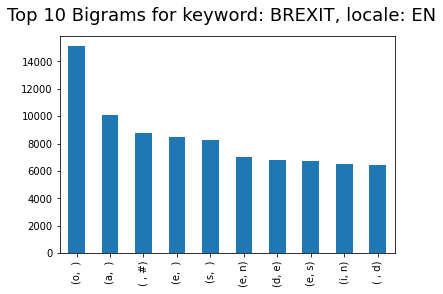

In [ ]:
plt.suptitle('Top 10 Bigrams for keyword: BREXIT, locale: EN', fontsize=18)
bigramseries[:10].plot(kind='bar')

# 1.x Gráfico de hastags 

In [ ]:
# CONTAGEM Hashtags do dataset
#df.text.str.extractall(r'(\#\w+)')[0].value_counts()
df['first_five_Letter'] = df.text.str.extractall(r'(\#\w+)')[0].value_counts()

In [ ]:
df.first_five_Letter

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3055   NaN
3056   NaN
3057   NaN
3058   NaN
3059   NaN
Name: first_five_Letter, Length: 2326, dtype: float64

In [ ]:
df.head()

id                created_at  ... hashtag first_five_Letter
0  1416145479939805191  2021-07-16T21:19:27.000Z  ...      []               NaN
1  1415925194321969155  2021-07-16T06:44:07.000Z  ...      []               NaN
2  1415123734671810561  2021-07-14T01:39:24.000Z  ...      []               NaN
3  1415873994637598722  2021-07-16T03:20:40.000Z  ...      []               NaN
4  1415059480149204996  2021-07-13T21:24:05.000Z  ...      []               NaN

[5 rows x 95 columns]

In [ ]:
pd.set_option('display.max_columns', None)
print(df)

ss

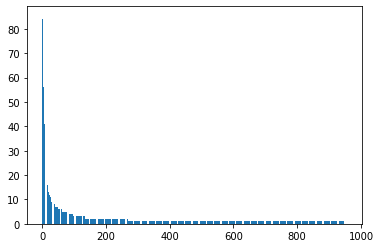

25


In [ ]:
import matplotlib.pyplot as plt

counts = df["author.username"].value_counts()
plt.bar(range(len(counts)),counts)
plt.show()
print(counts[10])

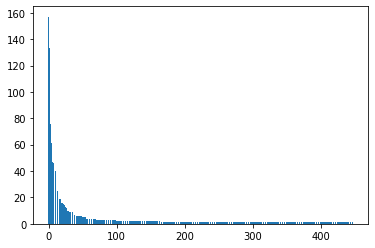

São Paulo, Brasil        157
Brasil                   133
Curitiba, Brasil          91
Campus Aracaju            76
Rio de Janeiro            61
                        ... 
Austin, TX                 1
Vitória. ES                1
Brasil salvador bahia      1
Juiz de Fora/MG            1
Campos Gerais, Brasil      1
Name: author.location, Length: 448, dtype: int64


In [ ]:
counts = df["author.location"].value_counts()
plt.bar(range(len(counts)),counts)
plt.show()
print(counts)

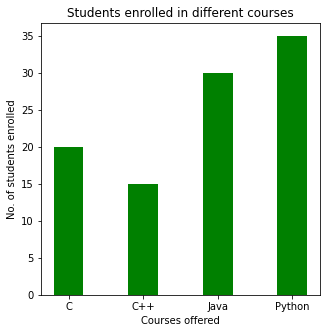

In [ ]:
import matplotlib.pyplot as plt  
  
   
# creating the dataset 
data = {'C':20, 'C++':15, 'Java':30,  
        'Python':35} 
courses = list(data.keys()) 
values = list(data.values()) 
   

fig = plt.figure(figsize = (5, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='green',  
        width = 0.4) 
  
plt.xlabel("Courses offered") 
plt.ylabel("No. of students enrolled") 
plt.title("Students enrolled in different courses") 
plt.show() 

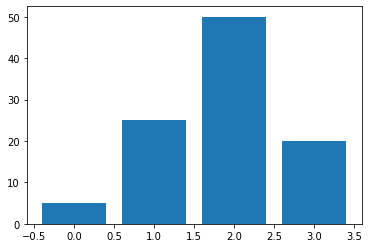

In [ ]:
import matplotlib.pyplot as plt 

data = [5., 25., 50., 20.]
plt.bar(range(len(data)),data)
plt.show()

#// to set the thickness of a bar, we can set 'width'
#// plt.bar(range(len(data)), data, width = 1.)

In [ ]:
#Which user is most active on twitter

import matplotlib.pyplot as plt
import seaborn as sns
count=df['author.username'].value_counts()
df_count=pd.DataFrame()
df_count['author.username'] = count.index
df_count['activeCount'] = count.values
df_count = df_count.iloc[:50,:]
drawbarplot(x=df_count.activeCount,y=df_count.author.username,xlabel='count',title='Top 50 active user in given time span',figsize=(16,16))

AttributeError: ignored

In [ ]:
#barplot function

def drawbarplot(x,y,xlabel,title,figsize=(10,10)):
    plt.figure(figsize=figsize)    
    sns.barplot(x=x,y=y,palette = 'terrain',orient='h',order=y)
    for i,v in enumerate(x):
        plt.text(0.8,i,v,color='k',fontsize=10)
    
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize =14)
    plt.show()

In [ ]:
df.info
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#Which user is most active on twitter
count=df['author.username'].value_counts()
df_count=pd.DataFrame()
df_count['author.username'] = count.index
df_count['activeCount'] = count.values
df_count = df_count.iloc[:50,:]
drawbarplot(x=df_count.activeCount,y=df_count.author.username, xlabel='count',title='Top 50 active user in given time span',figsize=(16,16))

#https://www.kaggle.com/overload10/twitter-dataset-eda

AttributeError: ignored

In [ ]:
df.isnull().sum()

id                           0
created_at                   6
text                         0
attachments.media         2065
attachments.media_keys    2065
                          ... 
__twarc.version              0
Unnamed: 91               3060
text_new                     0
hashtag                      0
first_five_Letter         3060
Length: 95, dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

id                        0
created_at                0
text                      0
attachments.media         0
attachments.media_keys    0
                         ..
__twarc.retrieved_at      0
__twarc.url               0
__twarc.version           0
Unnamed: 91               0
first_five_Letter         0
Length: 93, dtype: int64

In [ ]:
df.shape  

(0, 93)

In [ ]:
df.info #resolver parei em 06/07/2021
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#Which user is most active on twitter
count=df['author.username'].value_counts()
df_count=pd.DataFrame()
df_count['author.username'] = count.index
df_count['activeCount'] = count.values
df_count = df_count.iloc[:50,:]
drawbarplot(x=df_count.activeCount,y=df.author.username,xlabel='count',title='Top 50 active user in given time span',figsize=(16,16))

#https://www.kaggle.com/overload10/twitter-dataset-eda

AttributeError: ignored

In [ ]:

#df.info()

#Favoritos top 10 tweets
top_ten_tweets = df['favorite_count'].sort_values(ascending=False).head(10) # returns a df with first column = index, second column = tweet
top_ten_tweets

#print(id + "'s top 5 tweets (using favorite count)" + "\n")
#for i in range(5):
#    index = top_ten_tweets.index[i]
#    print(str(i+1) + ")" + df.iloc[index]['text'])
#    print("Favorite count: " + str(df.iloc[index]['favorite_count']) + "\n")

# retomar: https://4bic.github.io/2018-07-21-healthX_twitter_analysis/
#https://benalexkeen.com/resampling-time-series-data-with-pandas/
#https://medium.com/dataexplorations/thoughts-on-visionzero-first-steps-with-the-twitter-api-and-word2vec-for-text-analysis-e766ed6b55ab
#https://github.com/sergiers3/Mariano-Rajoy-Twitter-analysis-tutorial
#http://jurgens.people.si.umich.edu/tutorials/Mapping_Word_Frequencies_on_Twitter_using_Python.html


KeyError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


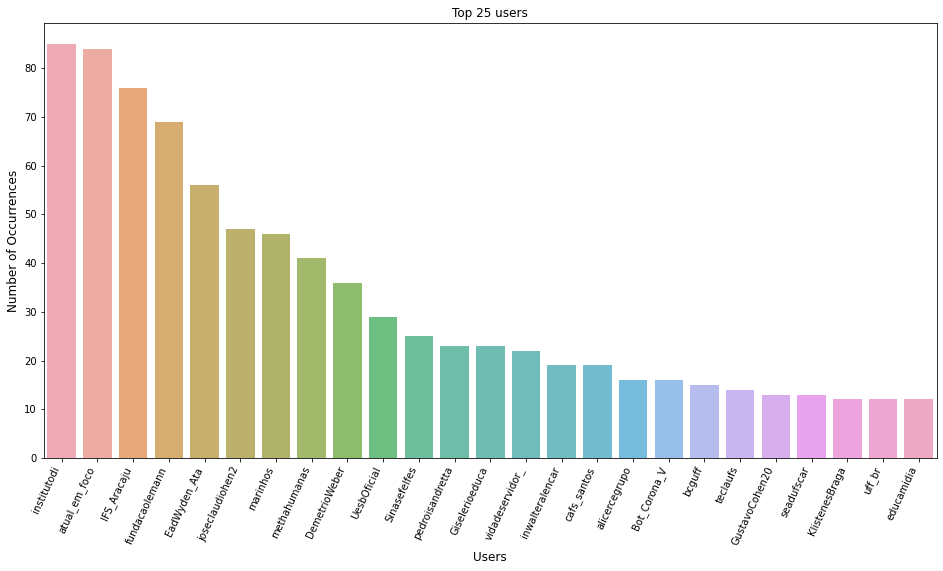

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
users_count  = df['author.username'].value_counts()
users_count = users_count[:25,]
plt.figure(figsize=(16,8))
sns.barplot(users_count.index, users_count.values, alpha=0.8)
plt.title('Top 25 users')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Users', fontsize=12)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

#https://github.com/dariaminsky/belarusian-twitter/blob/master/EDA.ipynb

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 95 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   id                                               0 non-null      int64         
 1   created_at                                       0 non-null      datetime64[ns]
 2   text                                             0 non-null      object        
 3   attachments.media                                0 non-null      object        
 4   attachments.media_keys                           0 non-null      object        
 5   attachments.poll.duration_minutes                0 non-null      float64       
 6   attachments.poll.end_datetime                    0 non-null      object        
 7   attachments.poll.id                              0 non-null      float64       
 8   attachments.poll.options                         0 n

In [ ]:
#df["created_at"] = df["created_at"].astype('datetime64[ns]') 
#df["created_at"] = df.created_at.dt.to_pydatetime()
df["created_at"] = pd.to_datetime(df['created_at'])

In [ ]:
df['created_at'] = pd.to_datetime(df.created_at)

In [ ]:
df['created_at'] 

0      2021-07-16 21:19:27+00:00
1      2021-07-16 06:44:07+00:00
2      2021-07-14 01:39:24+00:00
3      2021-07-16 03:20:40+00:00
4      2021-07-13 21:24:05+00:00
                  ...           
3055   2020-04-02 06:21:48+00:00
3056   2020-04-02 06:14:23+00:00
3057   2020-03-30 14:36:46+00:00
3058   2020-03-21 11:15:29+00:00
3059   2020-03-21 11:50:02+00:00
Name: created_at, Length: 2326, dtype: datetime64[ns, UTC]

In [ ]:
df.isna().sum()

id                        0
created_at                0
text                      0
attachments.media         0
attachments.media_keys    0
                         ..
__twarc.version           0
Unnamed: 91               0
text_new                  0
hashtag                   0
first_five_Letter         0
Length: 95, dtype: int64

In [ ]:
df["created_at"]

0      2021-07-16 21:19:27+00:00
1      2021-07-16 06:44:07+00:00
2      2021-07-14 01:39:24+00:00
3      2021-07-16 03:20:40+00:00
4      2021-07-13 21:24:05+00:00
                  ...           
3055   2020-04-02 06:21:48+00:00
3056   2020-04-02 06:14:23+00:00
3057   2020-03-30 14:36:46+00:00
3058   2020-03-21 11:15:29+00:00
3059   2020-03-21 11:50:02+00:00
Name: created_at, Length: 2326, dtype: datetime64[ns, UTC]

In [ ]:
# x contained NaN
df = df[df['created_at'].isnull()]

In [ ]:
df['created_at'].replace('','0',inplace=True)
df['created_at'].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


236   -9223372036854775808
Name: created_at, dtype: int64

In [ ]:
df['YearMonth'] = pd.to_datetime(df['created_at']).apply(lambda x: int(f'{x.year}{x.month}'))

ValueError: ignored

In [ ]:
#Contagem do Tuites mais antigo ao mais novo
print("Data twitter mais antigo:  ",df.created_at.min())
print("-----")
print("Data twitter mais novo  :  ",df.created_at.max())

#reactions = df.groupby(['created_at']).count()
#ax = reactions.replies.plot(figsize=(15,6),ls='--',c='red')
#ax.xaxis.grid(True)
#ax.yaxis.grid(True)

Data twitter mais antigo:   NaT
-----
Data twitter mais novo  :   NaT


In [ ]:
# Gráfico de volume de postages
# Convert the created_at column to np.datetime object
df['created_at'] = pd.to_datetime(df['created_at'])

df.set_index('created_at').resample('D').text.count().plot(color='r')


#Analisar os dados.. Tentar fazer script para contar twuites agregados de um mes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: ignored

In [ ]:
df.set_index('created_at').resample('M').text.count().plot(color='r')

AttributeError: ignored

In [ ]:
#ANALISE ORIGEM POST

df['source'].head()
# first extracting the client name including the >< characters
for source in df['source']:
    df['source'] = df['source'].str.extract('(\>.*\<)', expand=False) #output example: '>Twitter for Android<'
    
# after that extracting only the letters
for source in df['source']:
    df['source'] = df['source'].str.extract('([a-zA-Z ]+)', expand=False) #output example: 'Twitter for Android'

# get the value counts for source column
df['source'].value_counts()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Series([], Name: source, dtype: int64)

In [ ]:
#gráfico de origem dos posts
# get the value counts for source column
import seaborn as sns
df['source'].value_counts()

# plot the above data
# set the figure size
plt.figure(figsize=(15,8))

# create a countplot, ordered by count
sns.countplot(x='source', data=df, palette = 'Blues_r' , order = df['source'].value_counts().index)

# rotate the ticks for better readability
plt.xticks(rotation=45, fontsize='11', horizontalalignment='right')

# set the labels and title
plt.xlabel('Sources (i.e. Twitter clients)')
plt.ylabel('Total tweets sent')
plt.title('Tweets sent by source');

ValueError: ignored

<Figure size 1080x576 with 0 Axes>

In [ ]:
print(df['source'])

236    NaN
Name: source, dtype: object


**Analisando postagens com relação a datas**

In [ ]:
#Criar campo no dataframe mes-ano
df['mes_ano'] = pd.to_datetime(df['created_at']).dt.to_period('M')
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


id created_at text  ... hashtag first_five_Letter  mes_ano
236  1414207179163328515        NaT  nan  ...      []               NaN      NaT

[1 rows x 96 columns]

In [ ]:
#filtrar dataframe por ID, Text e Mes-ano
df[['id','text','mes_ano']]

id text mes_ano
236  1414207179163328515  nan     NaT

In [ ]:
# Total de postagens por dia
import pandas as pd
import dateutil
df['created_at'].value_counts()

# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
#https://www.dataquest.io/blog/python-datetime-tutorial/

Series([], Name: created_at, dtype: int64)

In [ ]:
# Total de postagens por mê
print('O tal de posts acumulados por mês é: ')
df['mes_ano'].value_counts()



O tal de posts acumulados por mês é: 


Series([], Freq: M, Name: mes_ano, dtype: int64)

In [ ]:
df.mes_ano 

Series([], Name: mes_ano, dtype: period[M])

Gráfico Tweets acumulado por mês

IndexError: ignored

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


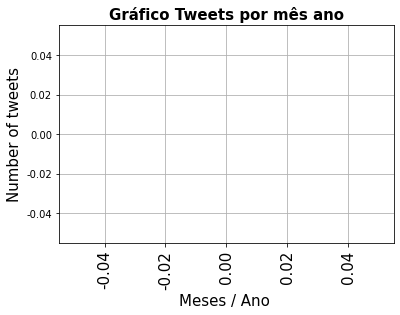

In [ ]:
import matplotlib.pyplot as plt
#Grafico de tweets acumulados por mês / ano


mes_ano_acumulado= df['mes_ano'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Meses / Ano ', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Gráfico Tweets por mês ano', fontsize=15, fontweight='bold')
plt.style.use('fivethirtyeight')
mes_ano_acumulado[:25].plot(ax=ax, kind='bar', color='blue')

#https://www.listendata.com/2019/06/matplotlib-tutorial-learn-plot-python.html
#https://pbpython.com/groupby-agg.html

In [ ]:
df.groupby('mes_ano', as_index=False).agg({"text": "sum"})

Empty DataFrame
Columns: [mes_ano, text]
Index: []

In [ ]:
df['mes_ano'].count()

KeyError: ignored

In [ ]:
#contar quantidade de informações do Dataframe
df.count()

# Total tweets
print ('Total tweets this period:', len(df.index), '\n')



Total tweets this period: 1 



# Nova seção

In [ ]:
df.isna().sum()

id                        0
created_at                1
text                      0
attachments.media         1
attachments.media_keys    1
                         ..
Unnamed: 91               1
text_new                  0
hashtag                   0
first_five_Letter         1
mes_ano                   1
Length: 96, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import numpy as np
import toolz as fp
import nltk
import warnings
# configuration
%matplotlib inline
sns.set()
%config InlineBackend.figure_format = 'svg' 
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')
nltk.download('rslp')
nltk.download('stopwords');

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 92 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               3060 non-null   int64  
 1   created_at                                       3054 non-null   object 
 2   text                                             3054 non-null   object 
 3   attachments.media                                995 non-null    object 
 4   attachments.media_keys                           995 non-null    object 
 5   attachments.poll.duration_minutes                4 non-null      float64
 6   attachments.poll.end_datetime                    4 non-null      object 
 7   attachments.poll.id                              4 non-null      float64
 8   attachments.poll.options                         4 non-null      object 
 9   attachments.poll.voting_status

In [ ]:
df['text'] = df['text'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 92 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               3060 non-null   int64  
 1   created_at                                       3054 non-null   object 
 2   text                                             3060 non-null   object 
 3   attachments.media                                995 non-null    object 
 4   attachments.media_keys                           995 non-null    object 
 5   attachments.poll.duration_minutes                4 non-null      float64
 6   attachments.poll.end_datetime                    4 non-null      object 
 7   attachments.poll.id                              4 non-null      float64
 8   attachments.poll.options                         4 non-null      object 
 9   attachments.poll.voting_status

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tweet_words = nltk.tokenize.word_tokenize(df["text"].drop_duplicates().str.lower().str.cat(sep=" ")) # separa em palavras
word_dist = fp.pipe(fp.keyfilter(lambda x: len(x) > 3, nltk.FreqDist(tweet_words)), # apenas palavras com mais de 3 caracteres
                    nltk.probability.FreqDist)

fig, ax = plt.subplots(figsize=(10, 7))

(pd.DataFrame(word_dist.most_common(25)[::-1],
              columns=['word', 'frequency'])
    .plot.barh(x="word", y="frequency", ax=ax));


NameError: ignored

In [ ]:
df.columns

Index(['id', 'created_at', 'text', 'attachments.media',
       'attachments.media_keys', 'attachments.poll.duration_minutes',
       'attachments.poll.end_datetime', 'attachments.poll.id',
       'attachments.poll.options', 'attachments.poll.voting_status',
       'attachments.poll_ids', 'author.id', 'author.created_at',
       'author.username', 'author.name', 'author.description',
       'author.entities.description.cashtags',
       'author.entities.description.hashtags',
       'author.entities.description.mentions',
       'author.entities.description.urls', 'author.entities.url.urls',
       'author.location', 'author.pinned_tweet_id', 'author.profile_image_url',
       'author.protected', 'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.listed_count',
       'author.public_metrics.tweet_count', 'author.url', 'author.verified',
       'author.withheld.scope', 'author.withheld.copyright',
       'author.withheld

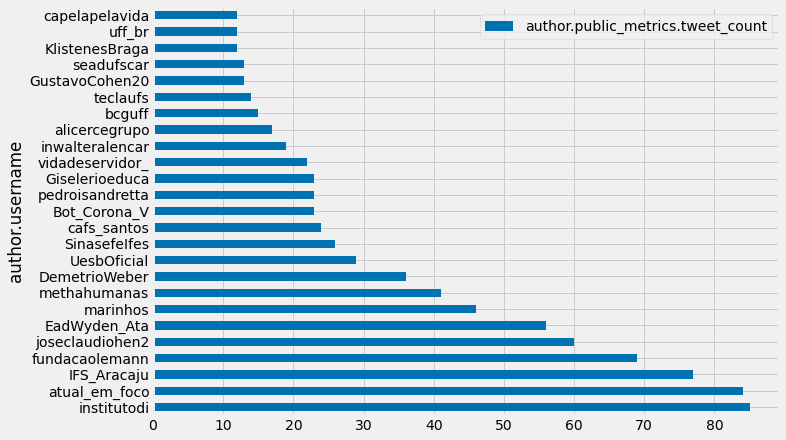

In [ ]:
import matplotlib.pyplot as plt

#Quais são os usuários que mais publicaram tweets, e quantos tweets publicaram?
fig, ax = plt.subplots(figsize=(10, 7))
(df
     .groupby("author.username")
     .agg({"author.public_metrics.tweet_count": "count"})
     .sort_values(by="author.public_metrics.tweet_count", ascending=False)
     .head(25).plot.barh(ax=ax));

# wordcloud

In [ ]:
#lowercase the column names
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'created_at', 'text', 'attachments.media',
       'attachments.media_keys', 'attachments.poll.duration_minutes',
       'attachments.poll.end_datetime', 'attachments.poll.id',
       'attachments.poll.options', 'attachments.poll.voting_status',
       'attachments.poll_ids', 'author.id', 'author.created_at',
       'author.username', 'author.name', 'author.description',
       'author.entities.description.cashtags',
       'author.entities.description.hashtags',
       'author.entities.description.mentions',
       'author.entities.description.urls', 'author.entities.url.urls',
       'author.location', 'author.pinned_tweet_id', 'author.profile_image_url',
       'author.protected', 'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.listed_count',
       'author.public_metrics.tweet_count', 'author.url', 'author.verified',
       'author.withheld.scope', 'author.withheld.copyright',
       'author.withheld

In [ ]:
df1=df[['text']]

In [ ]:

def clean_data(text):
    text = text.lower()  # convert all the text into lowercase
    text = text.strip()  #remove starting and trailing whitespaces
    special_char_reg = '([a-zA-Z0-9]+)' + '[!"#$%&\'()*+,-./:;<=>?@\\^_`{|}~]' + '([a-zA-Z0-9]+)'
    text = re.sub(special_char_reg, ' ', text)
    text = re.sub(r'\s+', ' ', text) #remove all line formattings
    text = re.sub(r'\d+', '', text) #remove digits
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    #text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = ''.join(c for c in text if c not in string.punctuation)   #remove pecial symbols from job titles
    return text


In [ ]:
df['text']

0       A Comissão de Acompanhamento ao Trabalho/Ensin...
1       Zoom e outras reuniões pela Internet l"Se você...
2       Ensino remoto tá puxado pra todo mundo, né?\nT...
3       RT @ericbrasiln: Ensino remoto tá puxado pra t...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    RT @marinhos: Ensino remoto. Mas o que importa...
3056    Ensino remoto. Improvisação, não inovação educ...
3057    A ironia provocada pelo novo coronavírus.\nNa ...
3058    En una semana todos los docentes trabajando te...
3059    É a verdade, incomode a quem incomodar.\nEs la...
Name: text, Length: 3060, dtype: object

In [ ]:
df['text'] = df['text'].astype('str')

In [ ]:
import re
tweet_df = df.text.apply(lambda x : clean_data(x))

NameError: ignored

In [ ]:
docs = df['text']
docs.head()

0    A Comissão de Acompanhamento ao Trabalho/Ensin...
1    Zoom e outras reuniões pela Internet l"Se você...
2    Ensino remoto tá puxado pra todo mundo, né?\nT...
3    RT @ericbrasiln: Ensino remoto tá puxado pra t...
4    Diante dos desafios do nosso tempo, os educado...
Name: text, dtype: object

In [ ]:
docs = df['text'].str.lower().str.replace('[^a-z\s#@]', '') # remove everything other than alphabets, spaces, # , @
docs_tokens = docs.str.split(' ')

tokens_all = []
for tokens in docs_tokens:
    tokens_all.extend(tokens)
print('No. of tokens in entire corpus:', len(tokens_all))

No. of tokens in entire corpus: 69283


In [ ]:
df.text.value_counts

<bound method IndexOpsMixin.value_counts of 0                            @rei__live \n零さん！誕生日おめでとう！！！！
1        @Tea_earte ありがとうございます🙇‍♂️\nTeaさんも6月生まれやったんですね！...
2        EXPLICANDO O KIKADÃO ✍🏻✨\n\nhttps://t.co/Oh5Ud...
3        eu explicando coisas em qualquer materia do ea...
4        A parte boa de estar no earte é poder estar em...
                               ...                        
23244    Finde es lustig wie Twitter das ohne mein zutu...
23245    @Sweetie_Alphys earte was du hast dem boy doch...
23246                                                  nan
23247    @YordiOrq @Spidex_ Mis cancione favoritas en g...
23248    ME REHUSO A EARTE UN ULTIMO BESOOOO ASI QUE GU...
Name: text, Length: 23249, dtype: object>

In [ ]:
text = " ".join(text for text in df.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 580385 words in the combination of all review.


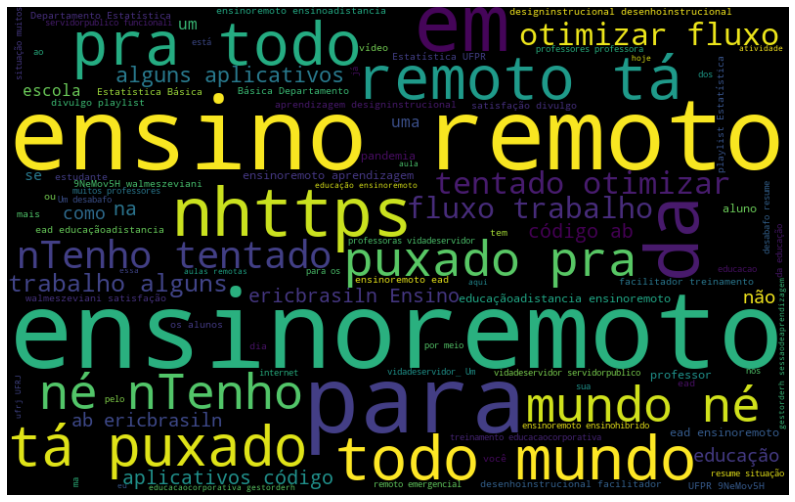

In [ ]:
# common words 05/07/2021 
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

all_words = ' '.join([text for text in df['text']])
stop_words = ["earte","https", "co", "RT", "de", "que","só","tea_earte","isso", "esse",]              + list(STOPWORDS)
#stop_words = nltk.corpus.stopwords.words("portuguese")
#stopwords = set(stopwords)
#stopwords.update(["earte", "nan", "tea_earte", "rt", "orbit",
#                  "em", "não", "https","de","que"])

from wordcloud import WordCloud
wordcloud = WordCloud(stopwords = stop_words, max_words=100, width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(14, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#https://github.com/sharmaroshan/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128210 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128210 missing from current font.
  font.set_text(s, 0, flags=flags)


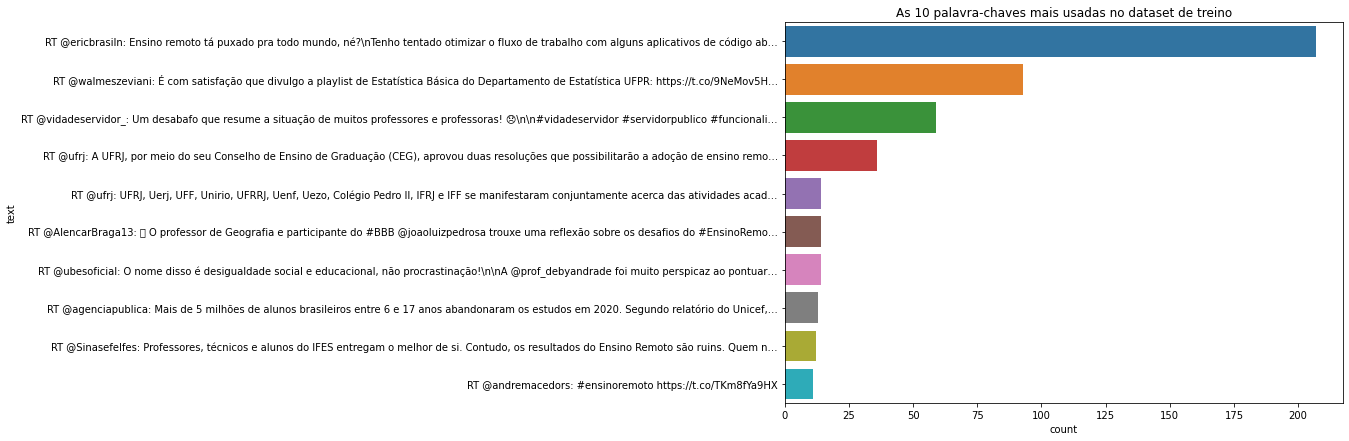

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (10,7))
#sns.countplot(data['Gender']
#sns.countplot(y= 'palavras', order=df['text'].value_counts().iloc[:10].index)
sns.countplot(y= df['text'], order=df['text'].value_counts().iloc[:10].index)

plt.title('As 10 palavra-chaves mais usadas no dataset de treino')
#matplotlib.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']
plt.show()

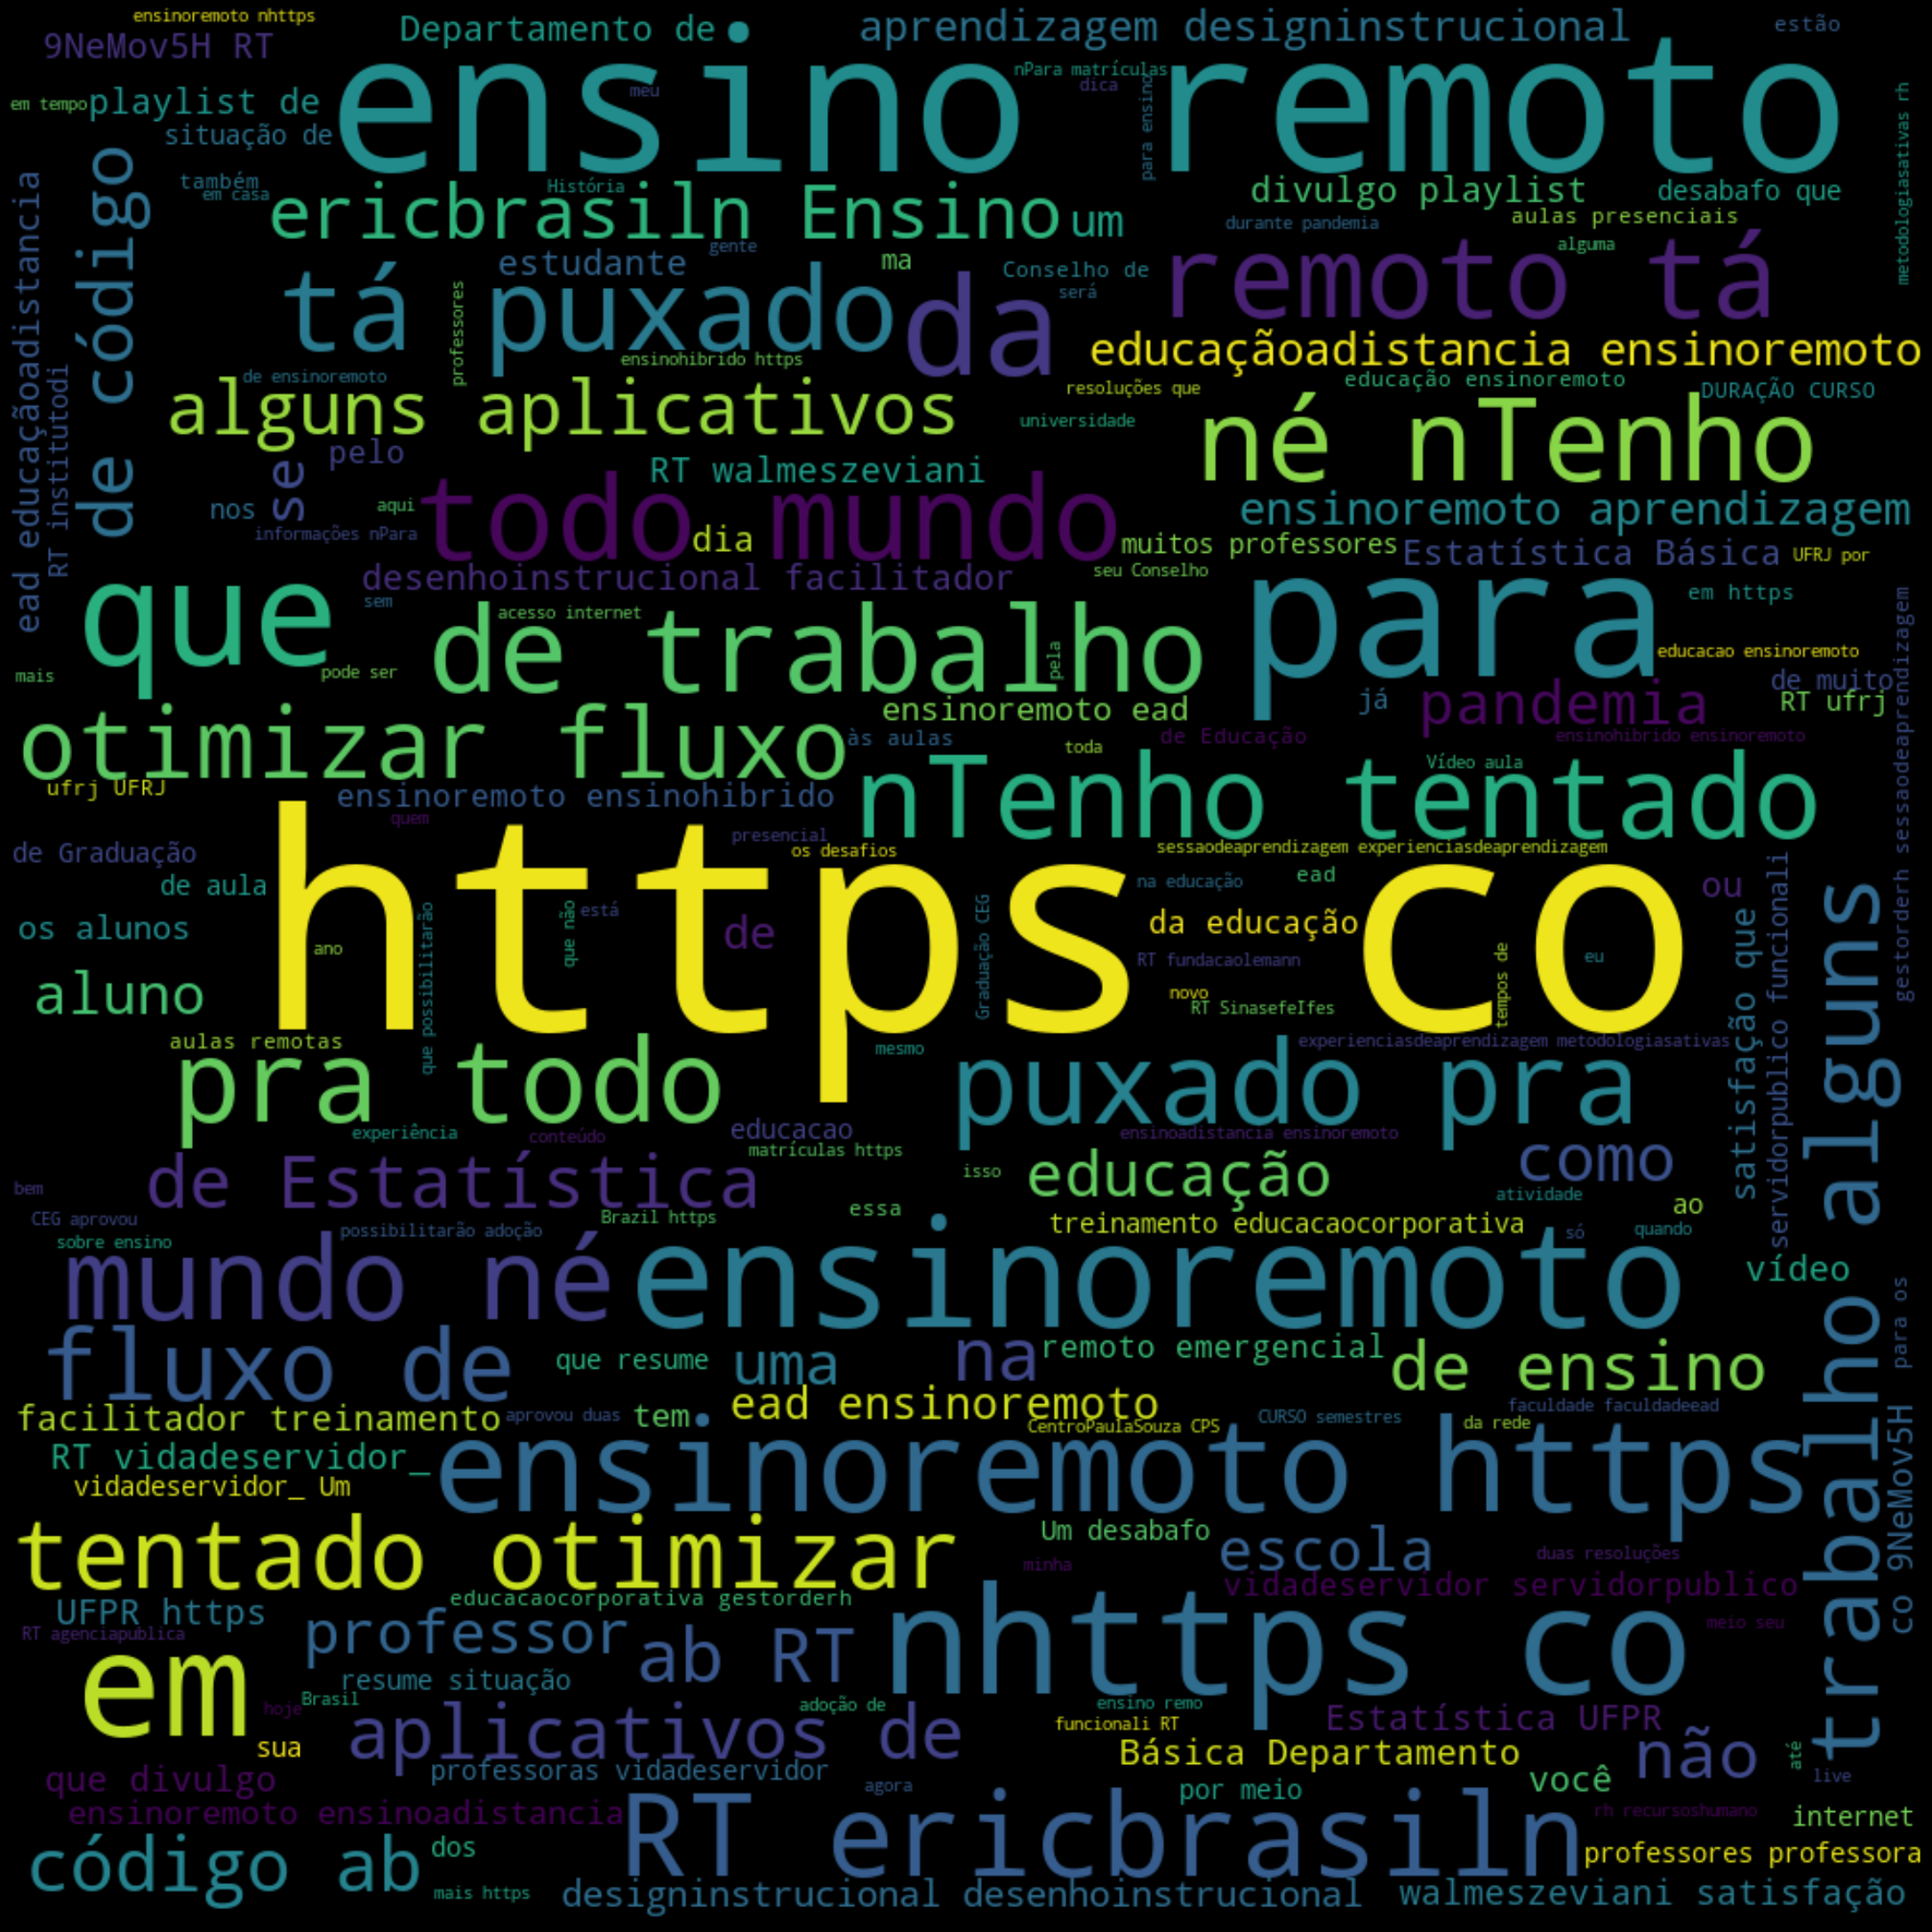

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#text = df.text.values
all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(
    width = 1000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Plotting the wordcloud 
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
 
# Creating the custom stopwords
#customStopwords=list(STOPWORDS)+ ['cases','corona','virus','people','will']

text = df.text.values

wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          #stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(text)
 
plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

TypeError: ignored

# 4.0 Analisando informações e agrupamento por data

In [ ]:
df.info()
topretweets = df.groupby('retweet_id').size().sort_values(ascending=False).reset_index()
topretweeted = df.groupby('retweet_user_screen_name').size().sort_values(ascending=False).reset_index()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23249 entries, 0 to 23248
Data columns (total 92 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               23249 non-null  int64  
 1   created_at                                       22629 non-null  object 
 2   text                                             22629 non-null  object 
 3   attachments.media                                2156 non-null   object 
 4   attachments.media_keys                           2156 non-null   object 
 5   attachments.poll.duration_minutes                21 non-null     float64
 6   attachments.poll.end_datetime                    21 non-null     object 
 7   attachments.poll.id                              21 non-null     float64
 8   attachments.poll.options                         21 non-null     object 
 9   attachments.poll.voting_stat

KeyError: ignored

# 4.0 Datas

In [ ]:

df1 = pd.DataFrame(df)
df['created_at'] = pd.to_datetime(df['created_at']) # convert to datetime data type
df.sort_values(by='created_at');
df1.created_at

0      2021-07-16 21:19:27+00:00
1      2021-07-16 06:44:07+00:00
2      2021-07-14 01:39:24+00:00
3      2021-07-16 03:20:40+00:00
4      2021-07-13 21:24:05+00:00
                  ...           
3055   2020-04-02 06:21:48+00:00
3056   2020-04-02 06:14:23+00:00
3057   2020-03-30 14:36:46+00:00
3058   2020-03-21 11:15:29+00:00
3059   2020-03-21 11:50:02+00:00
Name: created_at, Length: 3060, dtype: datetime64[ns, UTC]

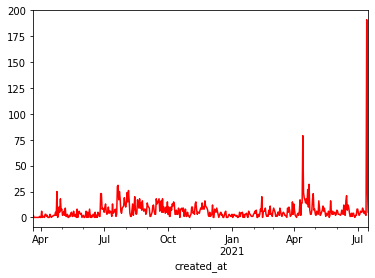

In [ ]:
# Gráfico de volume de postages
# Convert the created_at column to np.datetime object
df1['created_at'] = pd.to_datetime(df['created_at'])

df.set_index('created_at').resample('D').text.count().plot(color='r')

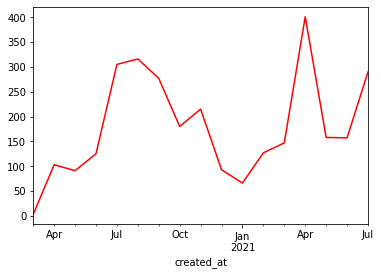

In [ ]:
df.set_index('created_at').resample('M').text.count().plot(color='r')

In [ ]:
#Criar campo no dataframe mes-ano
df['mes_ano'] = pd.to_datetime(df['created_at']).dt.to_period('M')
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


id                created_at  ... Unnamed: 91  mes_ano
0  1416145479939805191 2021-07-16 21:19:27+00:00  ...         NaN  2021-07
1  1415925194321969155 2021-07-16 06:44:07+00:00  ...         NaN  2021-07
2  1415123734671810561 2021-07-14 01:39:24+00:00  ...         NaN  2021-07
3  1415873994637598722 2021-07-16 03:20:40+00:00  ...         NaN  2021-07
4  1415059480149204996 2021-07-13 21:24:05+00:00  ...         NaN  2021-07

[5 rows x 93 columns]

In [ ]:
#filtrar dataframe por ID, Text e Mes-ano
df[['id','text','mes_ano']]

id  ...  mes_ano
0     1416145479939805191  ...  2021-07
1     1415925194321969155  ...  2021-07
2     1415123734671810561  ...  2021-07
3     1415873994637598722  ...  2021-07
4     1415059480149204996  ...  2021-07
...                   ...  ...      ...
3055  1245597281744613382  ...  2020-04
3056  1245595415124168707  ...  2020-04
3057  1244634679535427585  ...  2020-03
3058  1241322532495638531  ...  2020-03
3059  1241331230106431496  ...  2020-03

[3060 rows x 3 columns]

In [ ]:
# Total de postagens por dia
import pandas as pd
import dateutil
df['created_at'].value_counts()

# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
#https://www.dataquest.io/blog/python-datetime-tutorial/

2020-11-05 14:49:49+00:00    3
2020-12-04 18:47:07+00:00    3
2021-05-30 15:01:54+00:00    2
2020-04-24 19:54:40+00:00    2
2021-06-12 14:49:34+00:00    2
                            ..
2020-08-26 21:01:10+00:00    1
2020-07-22 20:10:32+00:00    1
2020-08-12 07:20:27+00:00    1
2020-10-20 10:00:55+00:00    1
2020-09-23 21:49:53+00:00    1
Name: created_at, Length: 3002, dtype: int64

In [ ]:
# Total de postagens por mê
print('O tal de posts acumulados por mês é: ')
df['mes_ano'].value_counts()

O tal de posts acumulados por mês é: 


2021-04    401
2020-08    316
2020-07    305
2021-07    290
2020-09    277
2020-11    215
2020-10    180
2021-05    158
2021-06    157
2021-03    147
2021-02    127
2020-06    125
2020-04    103
2020-12     93
2020-05     91
2021-01     66
2020-03      3
Freq: M, Name: mes_ano, dtype: int64

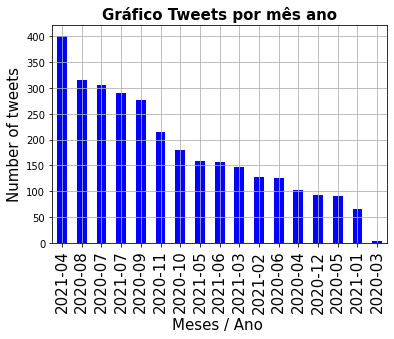

In [ ]:
import matplotlib.pyplot as plt
#Grafico de tweets acumulados por mês / ano


mes_ano_acumulado= df['mes_ano'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Meses / Ano ', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Gráfico Tweets por mês ano', fontsize=15, fontweight='bold')
plt.style.use('fivethirtyeight')
#mes_ano_acumulado[:5].plot(ax=ax, kind='bar', color='blue')
mes_ano_acumulado.plot(ax=ax, kind='bar', color='blue')
#https://www.listendata.com/2019/06/matplotlib-tutorial-learn-plot-python.html
#https://pbpython.com/groupby-agg.html

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

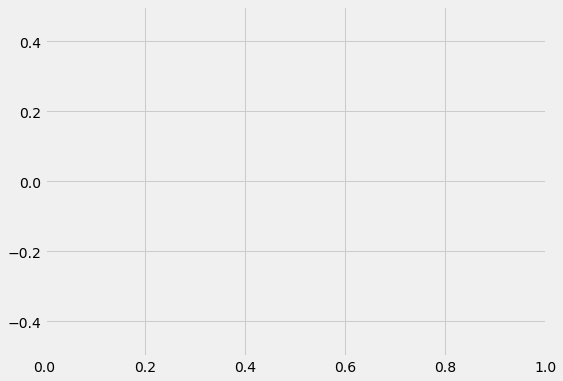

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-colorblind')

plt.figure(figsize=(8,6))
sns.swarmplot('mes_ano',  data=df);
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


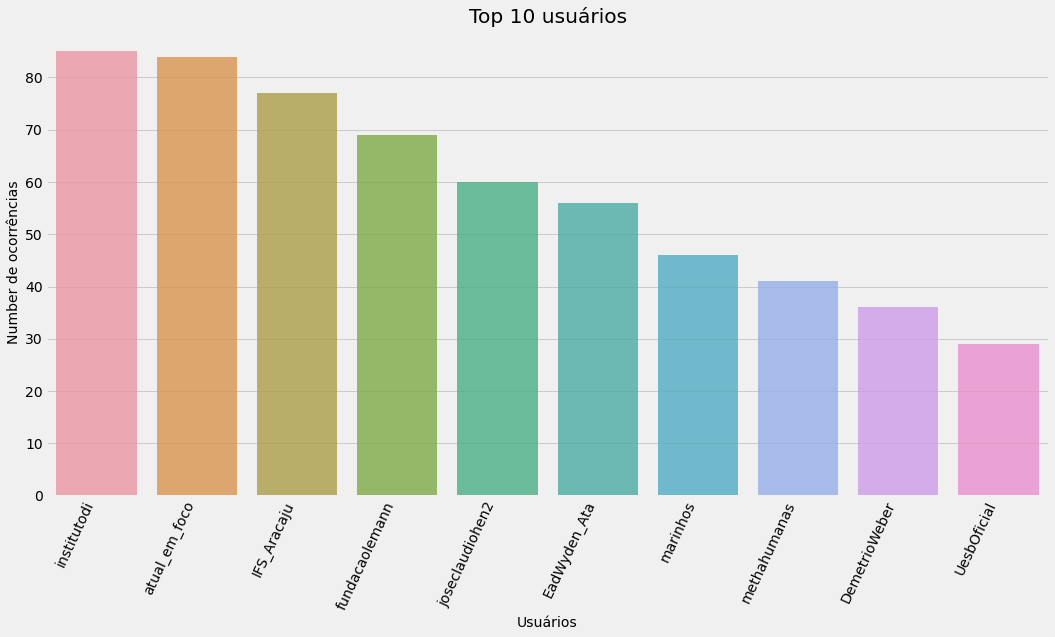

In [ ]:
# Top 25 users

#import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

users_count  = df['author.username'].value_counts()
users_count = users_count[:10,]
plt.figure(figsize=(16,8))
sns.barplot(users_count.index, users_count.values, alpha=0.8)
plt.title('Top 10 usuários')
plt.ylabel('Number de ocorrências', fontsize=14)
plt.xlabel('Usuários', fontsize=14)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()



In [ ]:
df.columns

Index(['id', 'created_at', 'text', 'attachments.media',
       'attachments.media_keys', 'attachments.poll.duration_minutes',
       'attachments.poll.end_datetime', 'attachments.poll.id',
       'attachments.poll.options', 'attachments.poll.voting_status',
       'attachments.poll_ids', 'author.id', 'author.created_at',
       'author.username', 'author.name', 'author.description',
       'author.entities.description.cashtags',
       'author.entities.description.hashtags',
       'author.entities.description.mentions',
       'author.entities.description.urls', 'author.entities.url.urls',
       'author.location', 'author.pinned_tweet_id', 'author.profile_image_url',
       'author.protected', 'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.listed_count',
       'author.public_metrics.tweet_count', 'author.url', 'author.verified',
       'author.withheld.scope', 'author.withheld.copyright',
       'author.withheld

In [ ]:
# make a new column to highlight retweets
df['is_retweet'] = df['text'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

1088

In [ ]:
# 10 most repeated tweets
df.groupby(['text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

text  counts
1578  RT @ericbrasiln: Ensino remoto tá puxado pra t...     207
1785  RT @walmeszeviani: É com satisfação que divulg...      93
1778  RT @vidadeservidor_: Um desabafo que resume a ...      59
1758  RT @ufrj: A UFRJ, por meio do seu Conselho de ...      36
1429  RT @AlencarBraga13: 📒 O professor de Geografia...      14
1760  RT @ufrj: UFRJ, Uerj, UFF, Unirio, UFRRJ, Uenf...      14
1753  RT @ubesoficial: O nome disso é desigualdade s...      14
1535  RT @agenciapublica: Mais de 5 milhões de aluno...      13
1511  RT @SinasefeIfes: Professores, técnicos e alun...      12
1551  RT @bterralivre: No #Antinomia de hj, conversa...      11

In [ ]:
def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', text)
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', text)
# make new columns for mentioned usernames and hashtags
#df['mentioned'] = df.text.apply(find_mentioned)
df['hashtags'] = df.text.apply(find_hashtags)

TypeError: ignored

In [ ]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

NameError: ignored

In [ ]:
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', df.text)  

In [ ]:
df['hashtags'] = df.text.apply(find_hashtags)

SyntaxError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 93 columns):
 #   Column                                           Non-Null Count  Dtype              
---  ------                                           --------------  -----              
 0   id                                               3060 non-null   int64              
 1   created_at                                       3054 non-null   datetime64[ns, UTC]
 2   text                                             3054 non-null   object             
 3   attachments.media                                995 non-null    object             
 4   attachments.media_keys                           995 non-null    object             
 5   attachments.poll.duration_minutes                4 non-null      float64            
 6   attachments.poll.end_datetime                    4 non-null      object             
 7   attachments.poll.id                              4 non-null      float64      

In [ ]:
df['author.location']

0                                NaN
1                Porto Velho, Brasil
2                   Salvador, Brasil
3                                NaN
4             Rio de Janeiro, Brasil
                    ...             
3055                          Brazil
3056    Here, there and everywhere. 
3057    Here, there and everywhere. 
3058                             NaN
3059    Here, there and everywhere. 
Name: author.location, Length: 3060, dtype: object

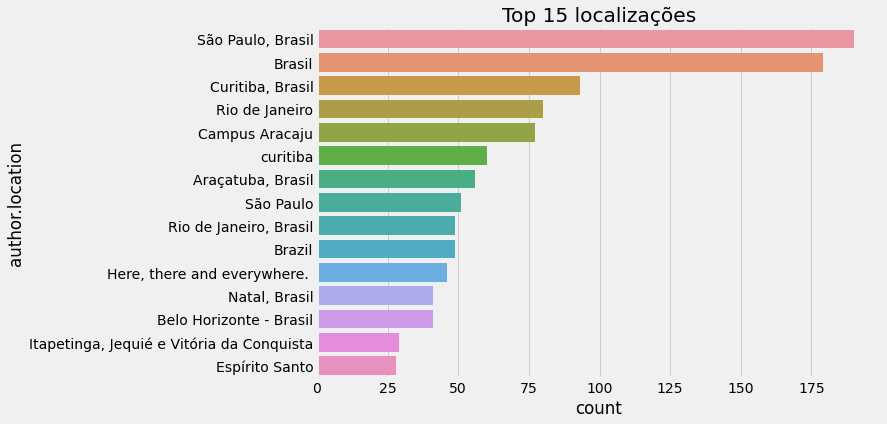

In [ ]:
# Most common locations
plt.figure(figsize=(9,6))
sns.countplot(y= 'author.location', data = df, order = df['author.location'].value_counts().iloc[:15].index);
plt.title('Top 15 localizações')
plt.show()

In [ ]:
#type(boulder_july_2018['date'][0])
type(df.created_at[0])


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
import re
def find_hashtags(text):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', text)   

df['hashtags'] = df.text.apply(find_hashtags).astype(str)

In [ ]:
#pd.set_option(“min_rows”, 100)
df.head(500)

id  ...                                           hashtags
0    1416145479939805191  ...  ['#trabalhoremoto', '#ensinoremoto', '#Educaca...
1    1415925194321969155  ...  ['#CDD', '#Zoom', '#GoogleMeet', '#EnsinoRemoto']
2    1415123734671810561  ...  ['#ensinoremoto', '#twitterstorians', '#digita...
3    1415873994637598722  ...                                                 []
4    1415059480149204996  ...                                  ['#EnsinoRemoto']
..                   ...  ...                                                ...
495  1396439250867036162  ...  ['#educa', '#ensinoremoto', '#coordena', '#men...
496  1396257257508294657  ...                  ['#Professores', '#EnsinoRemoto']
497  1396252885390868484  ...  ['#atualidadeemfoco', '#geografia', '#ensinore...
498  1396201577099239426  ...  ['#atualidadeemfoco', '#hist', '#ensinoremoto'...
499  1395472865395359747  ...  ['#IATBA', '#FerramentasDigitais', '#EnsinoRem...

[500 rows x 95 columns]

# 4.2 extraçao hashtags

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23249 entries, 0 to 23248
Data columns (total 92 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               23249 non-null  int64  
 1   created_at                                       22629 non-null  object 
 2   text                                             22629 non-null  object 
 3   attachments.media                                2156 non-null   object 
 4   attachments.media_keys                           2156 non-null   object 
 5   attachments.poll.duration_minutes                21 non-null     float64
 6   attachments.poll.end_datetime                    21 non-null     object 
 7   attachments.poll.id                              21 non-null     float64
 8   attachments.poll.options                         21 non-null     object 
 9   attachments.poll.voting_stat

In [ ]:
df['text'] = df['text'].apply(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 95 columns):
 #   Column                                           Non-Null Count  Dtype              
---  ------                                           --------------  -----              
 0   id                                               3060 non-null   int64              
 1   created_at                                       3054 non-null   datetime64[ns, UTC]
 2   text                                             3060 non-null   object             
 3   attachments.media                                995 non-null    object             
 4   attachments.media_keys                           995 non-null    object             
 5   attachments.poll.duration_minutes                4 non-null      float64            
 6   attachments.poll.end_datetime                    4 non-null      object             
 7   attachments.poll.id                              4 non-null      float64      

In [ ]:
df.count()

id                        3060
created_at                3054
text                      3060
attachments.media          995
attachments.media_keys     995
                          ... 
__twarc.version           3060
unnamed: 91                  0
mes_ano                   3054
is_retweet                3060
hashtags                  3060
Length: 95, dtype: int64

In [ ]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
#extracting hashtags from non racist/sexist tweets
import re
df.text.astype(str)
HT_regular = hashtag_extract(df['text'])

In [ ]:
HT_regular

[['trabalhoremoto', 'ensinoremoto', 'Educacao', 'Saude'],
 ['CDD', 'Zoom', 'GoogleMeet', 'EnsinoRemoto'],
 ['ensinoremoto', 'twitterstorians', 'digitalhumanities'],
 [],
 ['EnsinoRemoto'],
 [],
 [],
 [],
 ['Educacao',
  'EducationForAll',
  'homeoffice',
  'ensinoremoto',
  'homeschooling',
  'aulaonline',
  'quarentena'],
 ['Educacao',
  'EducationForAll',
  'homeoffice',
  'ensinoremoto',
  'homeschooling',
  'aulaon'],
 [],
 [],
 [],
 ['EnsinoHíbrido',
  'EnsinoRemoto',
  'Wordwall',
  'AtividadesEscolares',
  'Educação',
  'MetodologiasAtivas',
  'AprendizagemCooperativa',
  'FazEducação',
  'FazEducaçãoETecnologia'],
 [],
 [],
 ['ensinoremoto', 'Remoteteaching', 'remotelearning'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['ensinor

In [ ]:
# unnesting list
HT_regular = sum(HT_regular,[])

In [ ]:
import re    # for regular expressions
import nltk  # for text manipulation
# plot top n hashtags for positive class
freq_distribution = nltk.FreqDist(HT_regular) # key value pair
freq_dataframe = HT_regular({'Hashtag': list(freq_distribution.keys()),'Count': list(freq_distribution.values())})
# selecting top 20 most frequent hashtags
data = freq_dataframe.nlargest(columns="Count", n = 20)

plt.figure(figsize=(16,5))
ax = sns.barplot(data=df, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Frequency Distribution for Non Racist/Sexist tweets")
plt.show()

TypeError: ignored

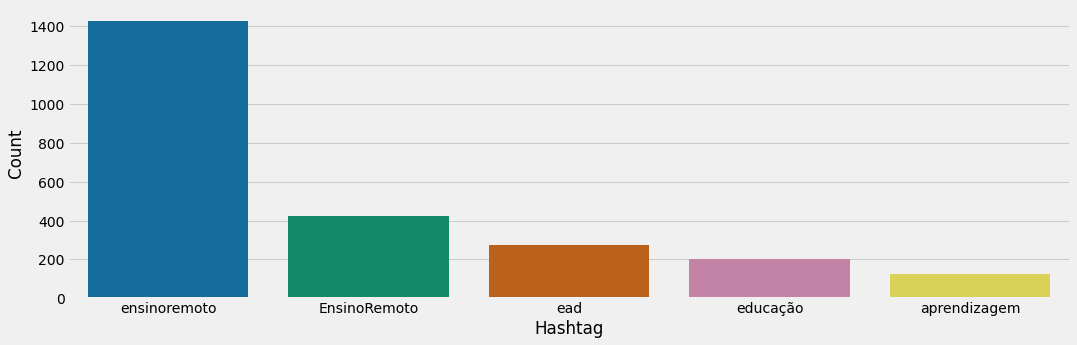

In [ ]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 5) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

#https://www.kaggle.com/binhminhs10/twitter-sentiment-analysis

In [ ]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[df.hashtags.apply(lambda hashtags_list: hashtags_list !=[]),['hashtags']]
hashtags_list_df

hashtags
0     ['#trabalhoremoto', '#ensinoremoto', '#Educaca...
1     ['#CDD', '#Zoom', '#GoogleMeet', '#EnsinoRemoto']
2     ['#ensinoremoto', '#twitterstorians', '#digita...
3                                                    []
4                                     ['#EnsinoRemoto']
...                                                 ...
3055        ['#EnsinoRemoto', '#Coronavirus', '#COVID']
3056  ['#EnsinoRemoto', '#COVID', '#CoronavirusPande...
3057  ['#coronavirus', '#celulares', '#EnsinoRemoto'...
3058                                                 []
3059  ['#Coronavirus', '#EnsinoRemoto', '#EnsenanzaR...

[3060 rows x 1 columns]

In [ ]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [ ]:
type(flattened_hashtags_df)

pandas.core.frame.DataFrame

In [ ]:
flattened_hashtags_df

hashtag
0            [
1            '
2            #
3            t
4            r
...        ...
169686       i
169687       n
169688       g
169689       '
169690       ]

[169691 rows x 1 columns]

In [ ]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame([hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list], columns=['hashtags'])

flattened_hashtags_df

hashtags
0             [
1             '
2             #
3             t
4             r
...         ...
169686        i
169687        n
169688        g
169689        '
169690        ]

[169691 rows x 1 columns]

In [ ]:
# number of unique hashtags
flattened_hashtags_df['hashtags'].unique().size

70

In [ ]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtags').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)


                              

In [ ]:
popular_hashtags.tail

<bound method NDFrame.tail of    hashtags  counts
0         '   21624
1         o   13743
2         e   12695
3         a   11308
4         #   10812
..      ...     ...
65        -       2
66        X       2
67        7       2
68        4       1
69        8       1

[70 rows x 2 columns]>

In [ ]:
type(popular_hashtags.head(10))

pandas.core.frame.DataFrame

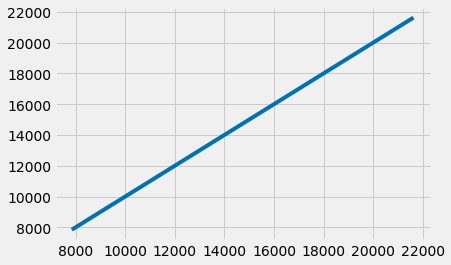

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
x = popular_hashtags.hashtags.head(10)
y = x = popular_hashtags.counts.head(10)
plt.plot(x,y)

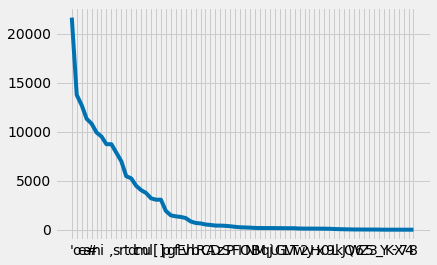

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.catplot(x="popular_hashtags", kind="counts", palette="ch:.25", data=popular_hashtags)
#plt.plot(popular_hashtags['hashtags.head(10)'], popular_hashtags['counts'])
plt.plot(popular_hashtags['hashtags'], popular_hashtags['counts'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


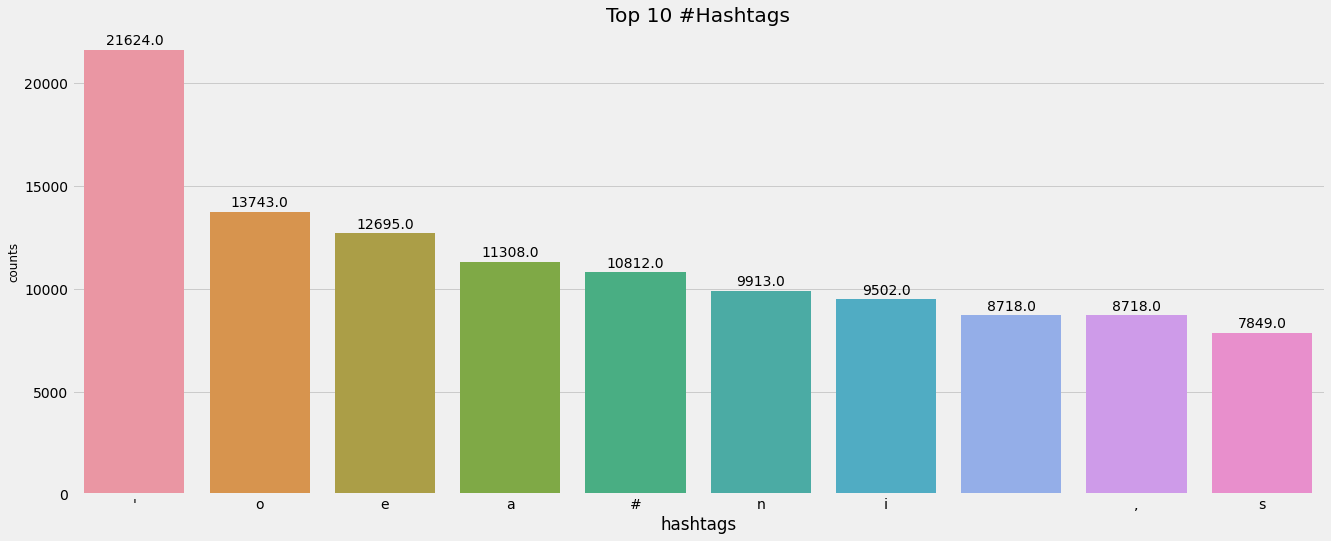

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
x = popular_hashtags.hashtags.head(10)
y = popular_hashtags.counts.head(10)
plt.title('Top 10 #Hashtags')
plt.ylabel('#Hashtags', fontsize=12)
splot= sns.barplot(x,y, data=popular_hashtags);
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')



In [ ]:
popular_hashtags


hashtags  counts
0         '   21624
1         o   13743
2         e   12695
3         a   11308
4         #   10812
..      ...     ...
65        -       2
66        X       2
67        7       2
68        4       1
69        8       1

[70 rows x 2 columns]

# 4.9 Popular hashtags

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 92 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               3060 non-null   int64  
 1   created_at                                       3054 non-null   object 
 2   text                                             3060 non-null   object 
 3   attachments.media                                995 non-null    object 
 4   attachments.media_keys                           995 non-null    object 
 5   attachments.poll.duration_minutes                4 non-null      float64
 6   attachments.poll.end_datetime                    4 non-null      object 
 7   attachments.poll.id                              4 non-null      float64
 8   attachments.poll.options                         4 non-null      object 
 9   attachments.poll.voting_status

In [116]:
df['hashtag'].value_counts()[:10].plot(kind='barh')


KeyError: ignored

TypeError: ignored

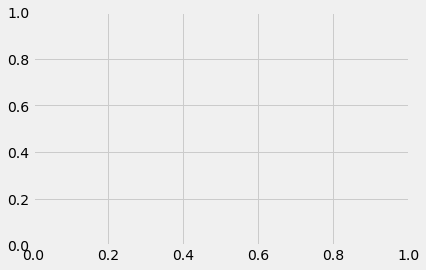

In [ ]:
plt.plot(popular_hashtags.head(10))

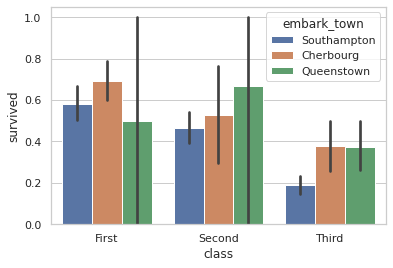

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic_dataset = sns.load_dataset("titanic")

sns.barplot(x = "class", y = "survived", hue = "embark_town", data = titanic_dataset)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


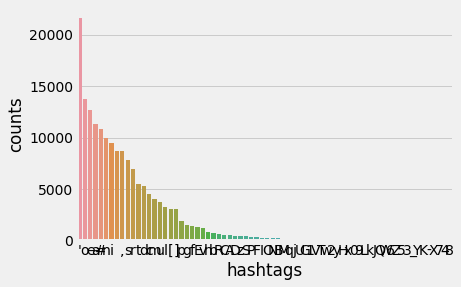

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot('hashtags', 'counts', data=popular_hashtags)
plt.show()

In [ ]:
# get the value counts for source column
#popular_hashtags[['hashtags','counts']]
popular_hashtags['hashtags'].value_counts()
#popular_hashtags.index

A    1
u    1
e    1
F    1
2    1
    ..
N    1
0    1
U    1
7    1
I    1
Name: hashtags, Length: 70, dtype: int64

In [ ]:
# Gráfico hashtags
popular_hashtags.sort_values(['hashtags', 'counts'], ascending=False).groupby('hashtags').head(10)
#cat_totals = popular_hashtags.groupby("hashtags")["counts"].sum().sort_values()
#cat_totals
plt.figure(figsize=(15,8))
cat_totals.plot(kind="barh", fontsize=4)
#https://realpython.com/pandas-plot-python/

NameError: ignored

<Figure size 1080x576 with 0 Axes>

In [ ]:
#popular_hashtags.sort_values(['hashtags', 'counts'], ascending=True).groupby('hashtags').head(10)
#popular_hashtags.sort_index(level=0).groupby('hashtags').head(10)
#popular_hashtags.groupby(['counts', 'hashtags']).size().head(10)
popular_hashtags.nlargest(10,['counts'])

hashtags  counts
0        '   21624
1        o   13743
2        e   12695
3        a   11308
4        #   10812
5        n    9913
6        i    9502
7             8718
8        ,    8718
9        s    7849

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



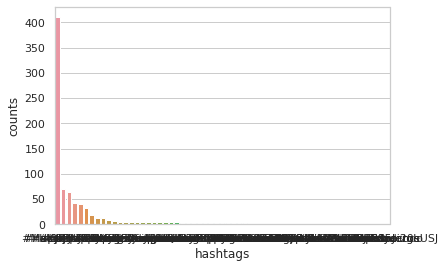

In [ ]:
sns.barplot('hashtags', 'counts', data=popular_hashtags)
plt.show()

TypeError: ignored

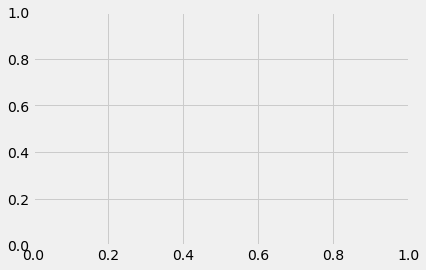

In [ ]:
import matplotlib.pyplot as plt
x = popular_hashtags.nlargest(10,['counts'])

#type(x)
#x.columns
#y

plt.plot(x)
plt.show()

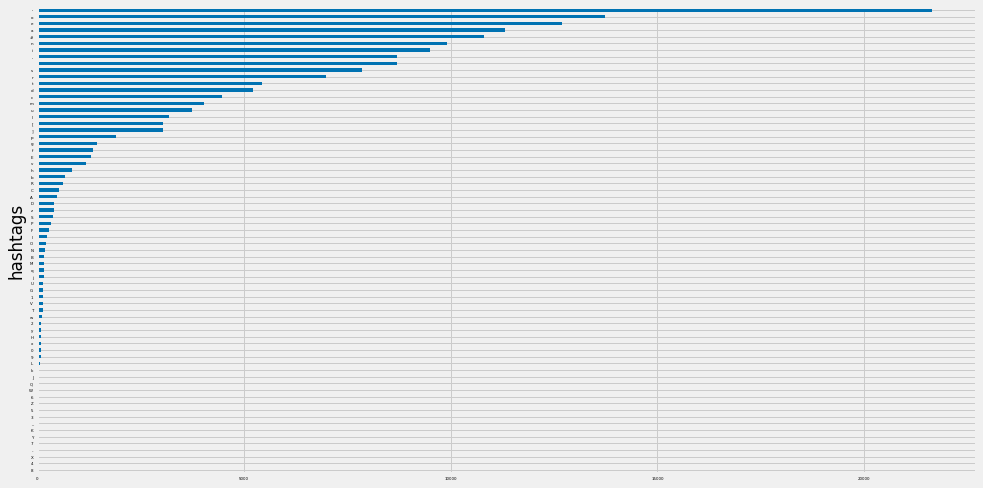

In [ ]:
# Gráfico hashtags
cat_totals = popular_hashtags.groupby("hashtags")["counts"].sum().sort_values()
cat_totals
plt.figure(figsize=(15,8))
cat_totals.plot(kind="barh", fontsize=4)
#https://realpython.com/pandas-plot-python/

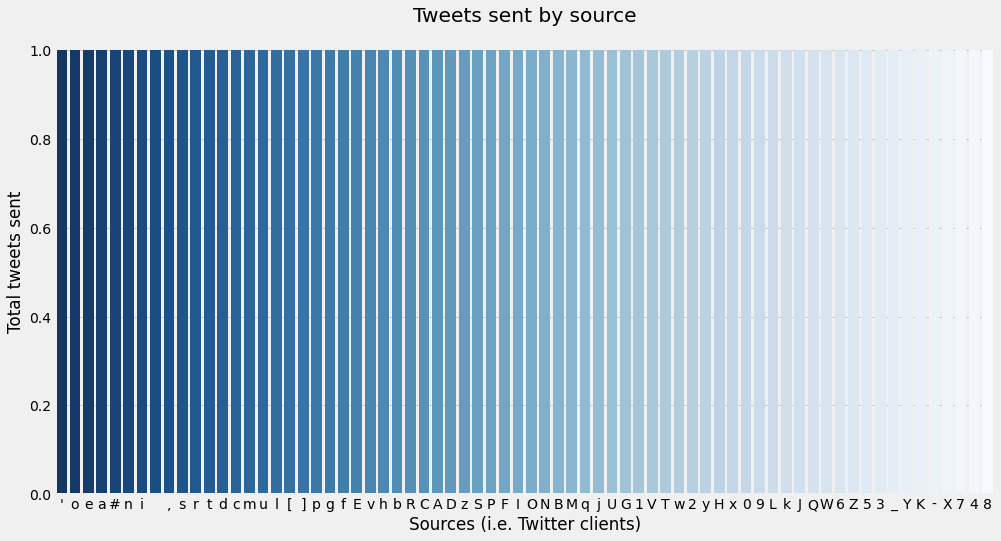

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot the above data
# set the figure size
plt.figure(figsize=(15,8))

# create a countplot, ordered by count
sns.countplot(x='hashtags', data=popular_hashtags, palette = 'Blues_r' )
#sns.catplot(x="hashtags", kind="counts", palette="ch:.25", data=popular_hashtags)
# rotate the ticks for better readability
#plt.xticks(rotation=45, fontsize='11', horizontalalignment='right')

# set the labels and title
plt.xlabel('Sources (i.e. Twitter clients)')
plt.ylabel('Total tweets sent')
plt.title('Tweets sent by source');

In [ ]:
popular_hashtags

['counts', 'hashtags']

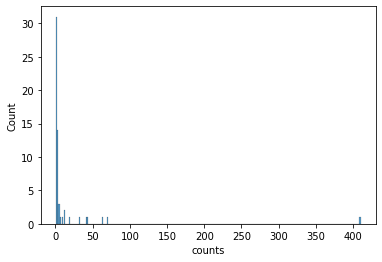

In [ ]:
import seaborn as sns
sns.histplot(popular_hashtags.counts) #, kde=True)
#sns.countplot(x='hashtags', data=popular_hashtags, palette = 'Blues_r' , order = df['hashtags'].value_counts().index)
plt.show()

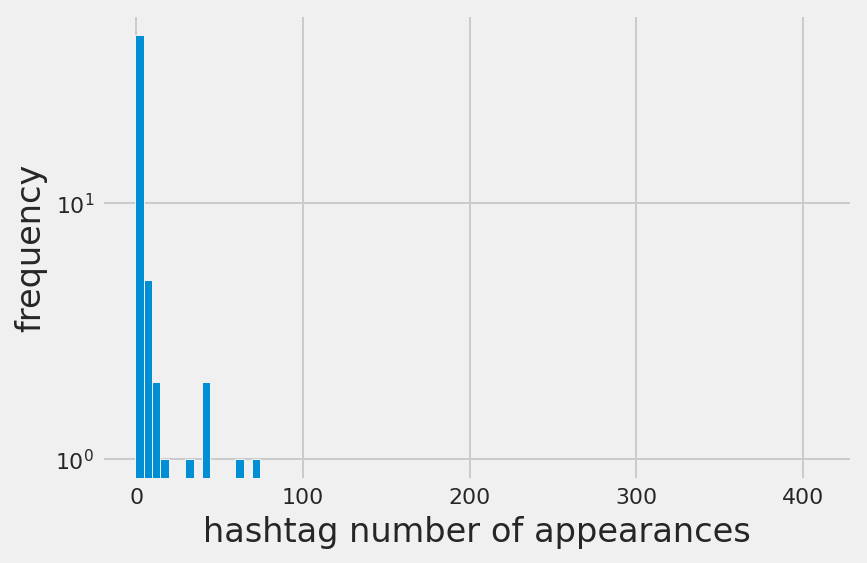

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtags']).size()\
                              .reset_index(name='counts')\
                              .counts
# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5 

# plot histogram of tweet counts
#plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

# 4.10 Grafico Tags

In [ ]:
popular_hashtags.info

NameError: ignored

In [ ]:
df.popular_hashtags = pd.DataFrame(popular_hashtags)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
df.popular_hashtags.columns
#type(df.popular_hashtags)

Index(['hashtags', 'counts'], dtype='object')

In [ ]:
df.popular_hashtags

AttributeError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
plt.figure(figsize=(26,16))
df.popular_hashtags.sort_values(by='counts').plot.barh(x='hashtags', y='counts', ax=ax, color="purple")
ax.set_title("Top Hashtags")
plt.show()

#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/

AttributeError: ignored

In [ ]:
print(df.popular_hashtags['hashtags'], ['counts'])

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



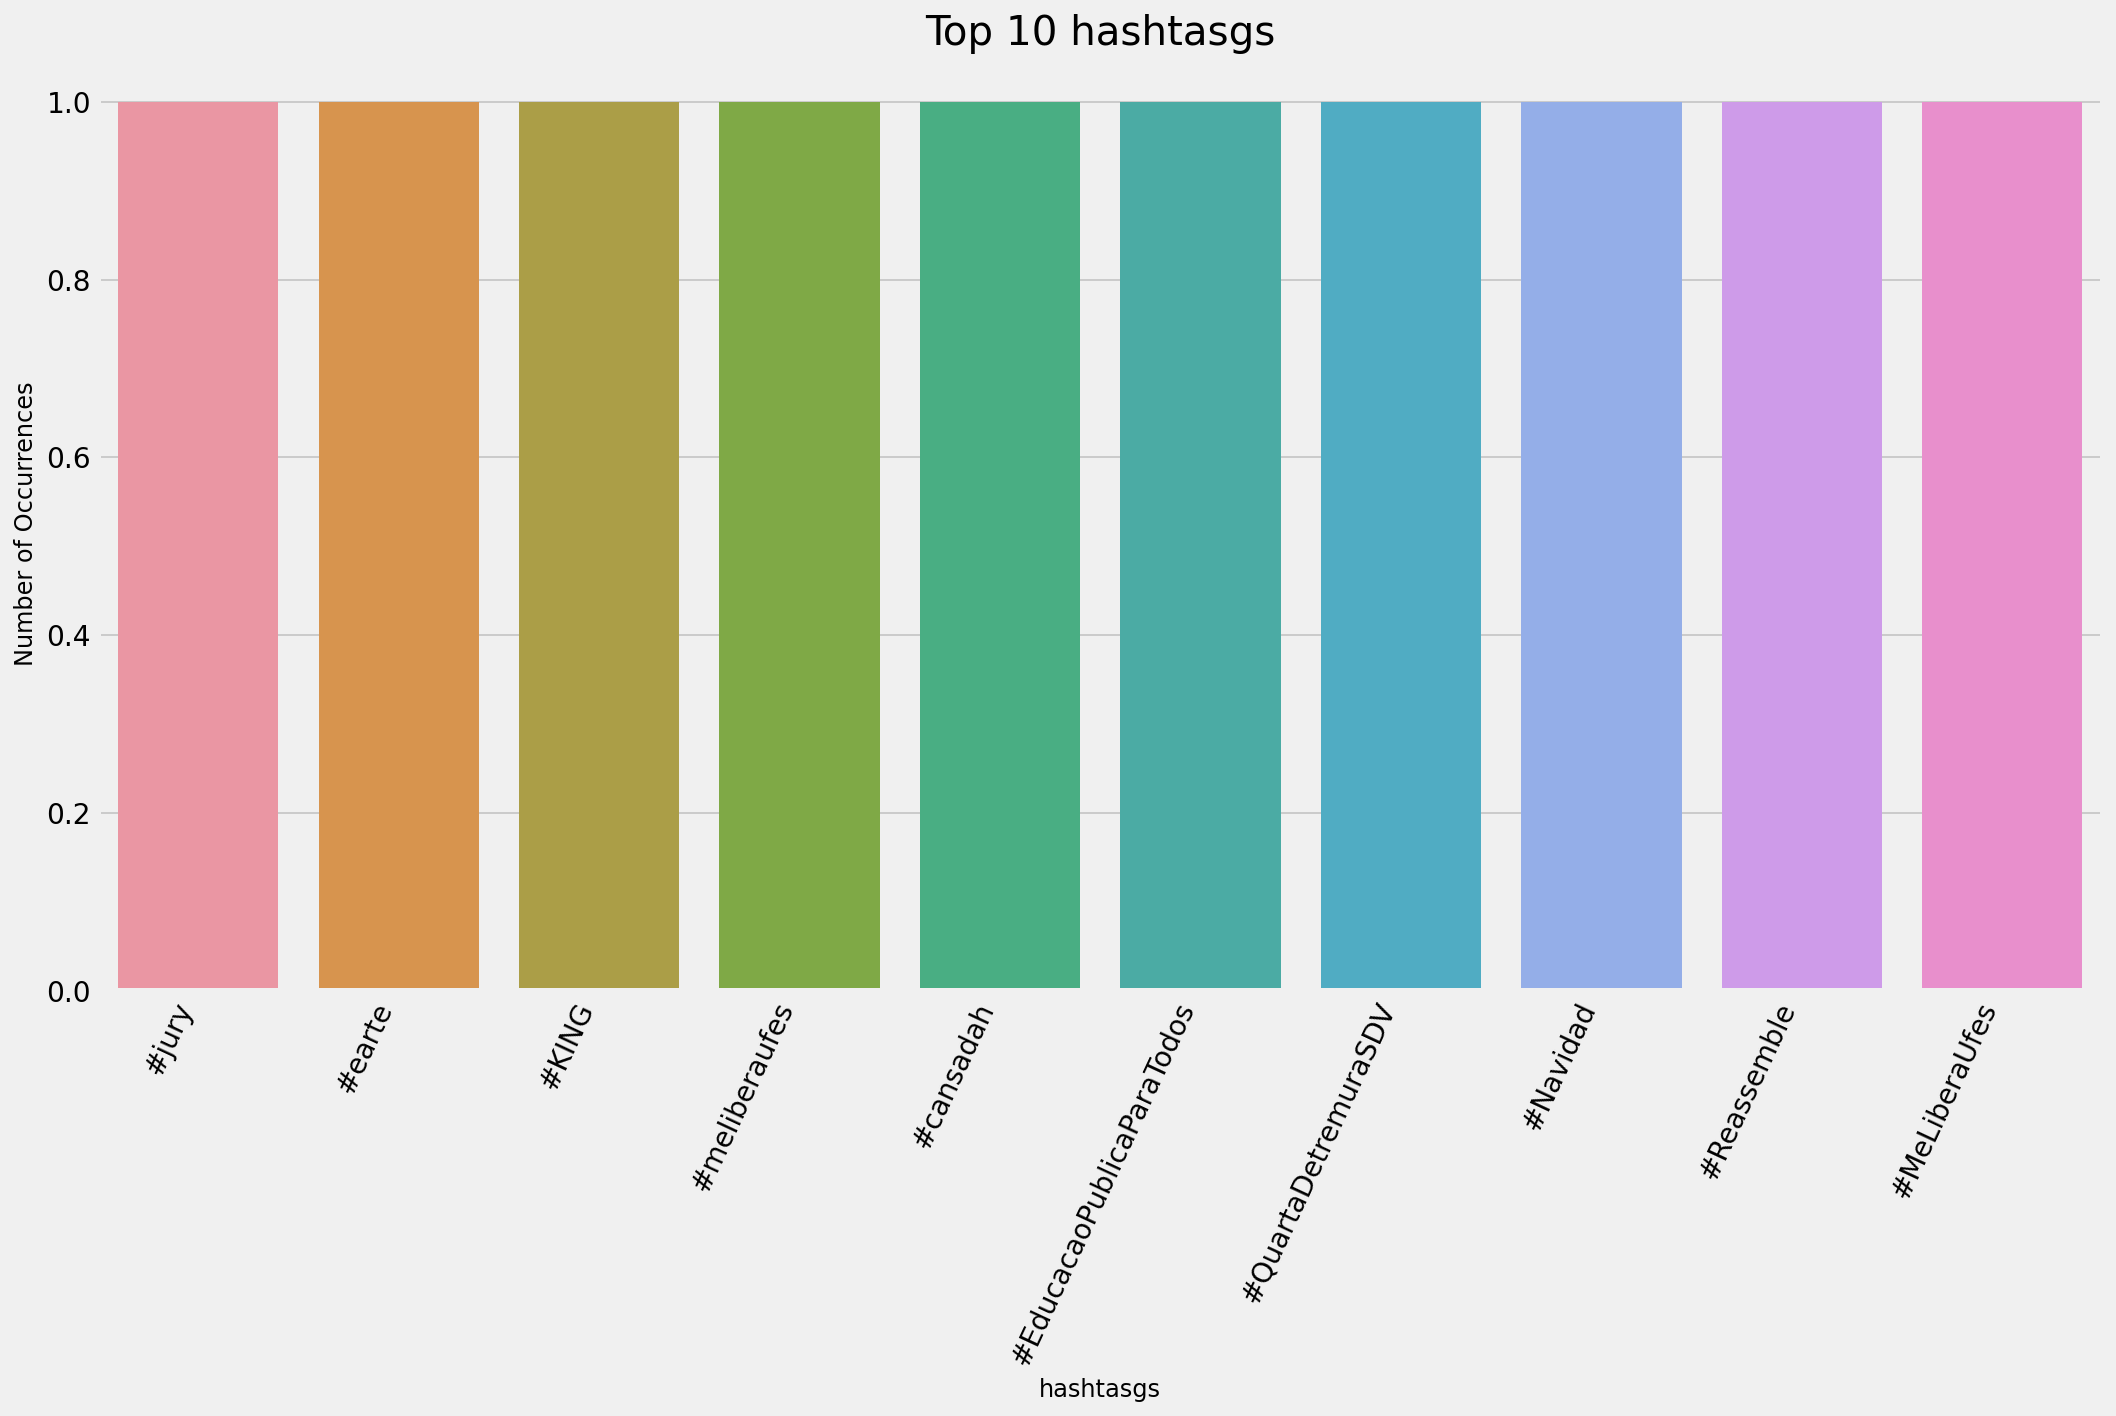

In [ ]:
# teste 

#import matplotlib.pyplot as plt
import seaborn as sns
users_count  = df.popular_hashtags['hashtags'].value_counts()
users_count = users_count[:10,]
plt.figure(figsize=(16,8))
sns.barplot(users_count.index, users_count.values)
plt.title('Top 10 hashtasgs')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hashtasgs', fontsize=12)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()


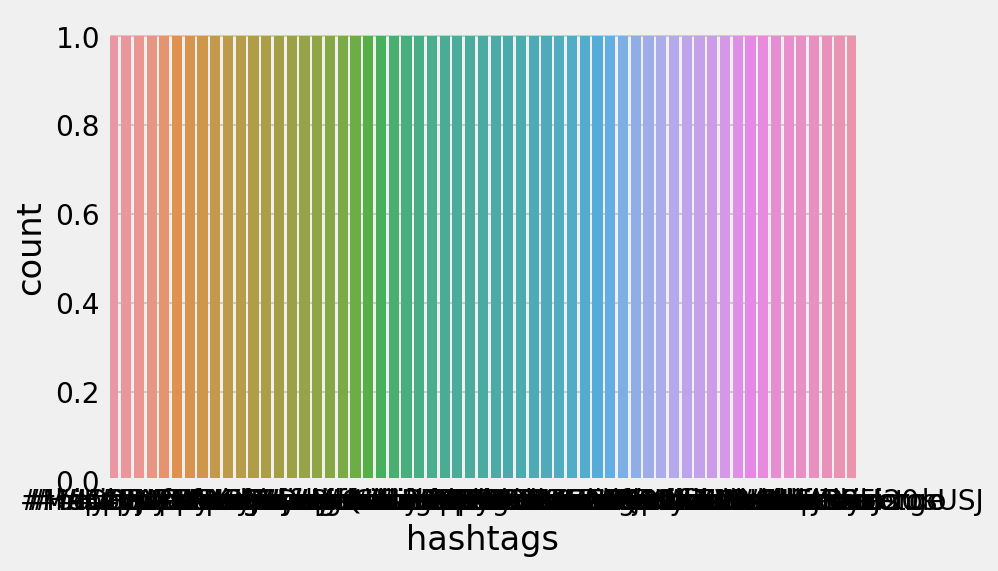

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot (x='hashtags', data=df.popular_hashtags)
plt.show()
#(df['df.popular_hashtags], bins = 10)

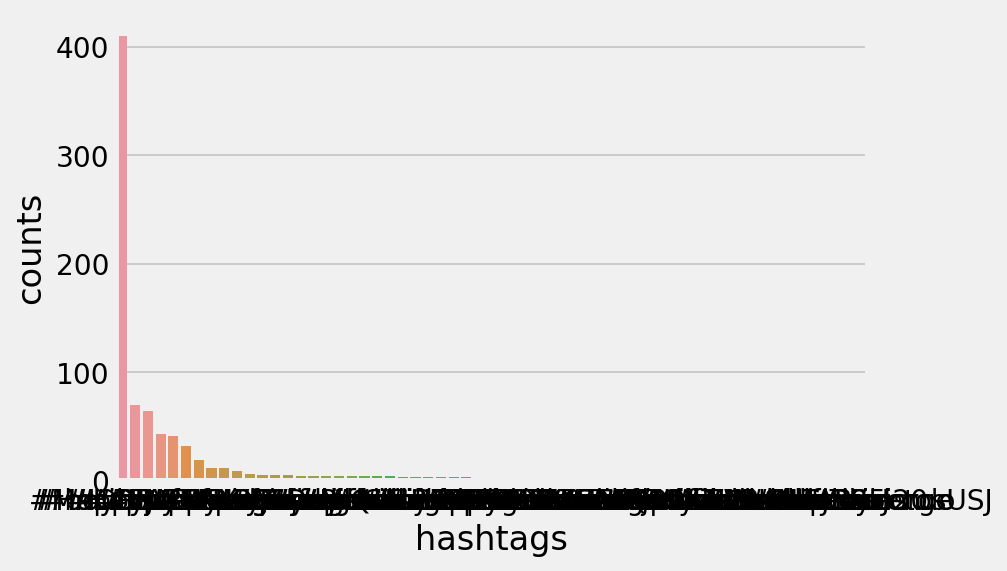

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

#sns.scatterplot(data=popular_hashtags, x="hashtags", y="counts")
ax = sns.barplot(x="hashtags", y="counts", data=popular_hashtags)

In [ ]:
word_list = [word for line in popular_hashtags for word in line.split()]
word_list[:5]

['counts', 'hashtags']

In [ ]:
word_list[:5]

['counts', 'hashtags']

In [ ]:
from collections import Counter
sns.set(style="darkgrid")
popular_hashtags = pd.DataFrame(hashtags)
popular_hashtags = ['counts', 'hashtags']
fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="frequency", x='word', ax = ax, data=popular_hashtags)


NameError: ignored

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")
# Create a visualization


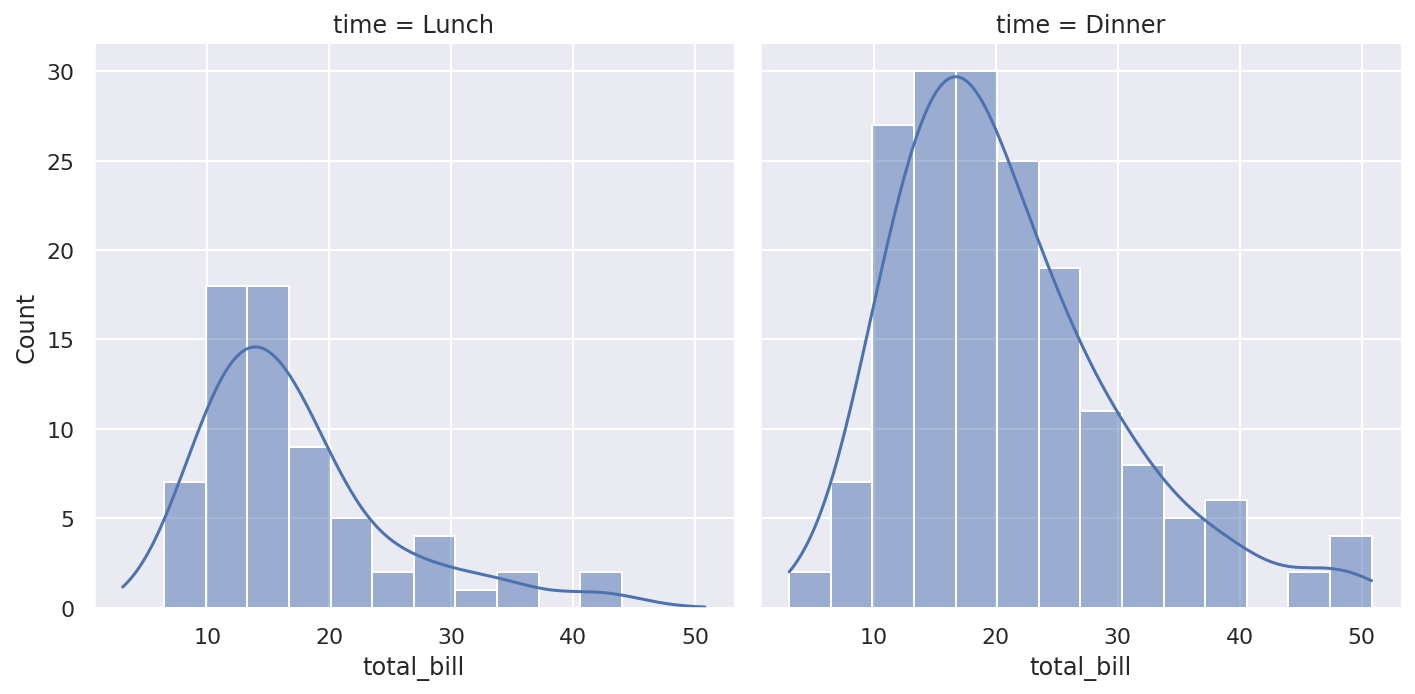

In [ ]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

flights_data = sns.load_dataset("flights")
flights_data.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

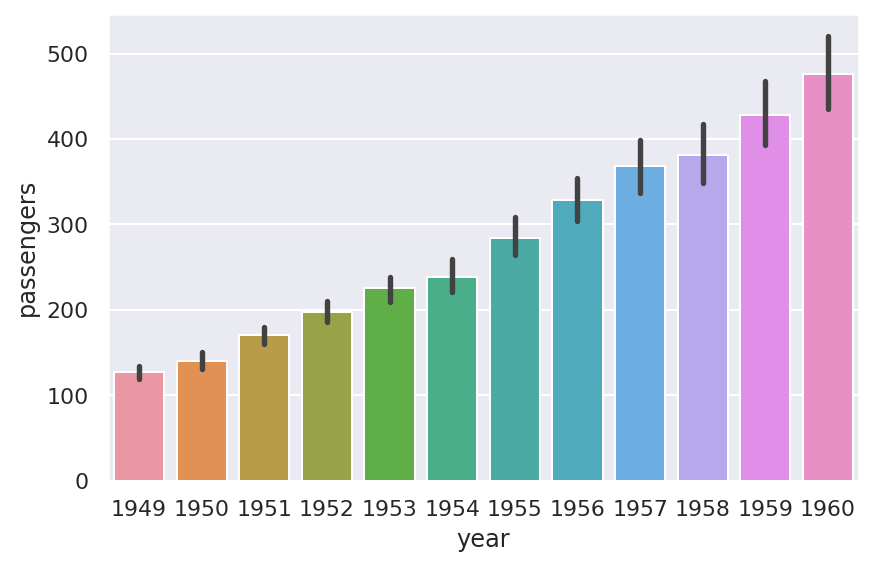

In [ ]:
sns.barplot(data = flights_data, x = "year", y = "passengers")

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = "hashtags", y = "counts", data = popular_hashtags)

AttributeError: ignored

In [ ]:
popular_hashtags

['counts', 'hashtags']

In [ ]:
from pandas import DataFrame
df3 = dataframe (popular_hashtags).transpose ()
df.columns ['hashtags', 'counts']

NameError: ignored

# Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
len(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


204

In [ ]:
stopwords[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

# Analise de sentimentos Textblob

In [ ]:
df.head()

id                created_at  ... __twarc.version Unnamed: 91
0  1416145479939805191  2021-07-16T21:19:27.000Z  ...           2.3.7         NaN
1  1415925194321969155  2021-07-16T06:44:07.000Z  ...           2.3.7         NaN
2  1415123734671810561  2021-07-14T01:39:24.000Z  ...           2.3.7         NaN
3  1415873994637598722  2021-07-16T03:20:40.000Z  ...           2.3.7         NaN
4  1415059480149204996  2021-07-13T21:24:05.000Z  ...           2.3.7         NaN

[5 rows x 92 columns]

In [ ]:
from textblob import TextBlob
import re
import numpy as np 

def clean_tweet(tweet):
    # remove special characters, links from tweets
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    # predict the sentiment of a tweet using textblob
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

# create a new column with the result of the sentiment analysis
df['sentiment'] = np.array([analize_sentiment(tweet) for tweet in df['text']])

# construct lists with classified tweets
pos_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] < 0]

# print percentages
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['text'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(df['text'])))

#verificar analise dos percentuais

#https://www.codementor.io/@ferrorodolfo/sentiment-analysis-on-trump-s-tweets-using-python-pltbvb4xr


Percentage of positive tweets: 6.0130718954248366%
Percentage of neutral tweets: 92.6797385620915%
Percentage of negative tweets: 1.3071895424836601%


In [ ]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['text'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(df['text'])))

Percentage of positive tweets: 6.0130718954248366%
Percentage of neutral tweets: 92.6797385620915%
Percentage de negative tweets: 1.3071895424836601%


In [ ]:
sentiments = ['Positivos', 'Negativos','Neutro']
percents = [len(pos_tweets), len(neg_tweets), len(neu_tweets)]

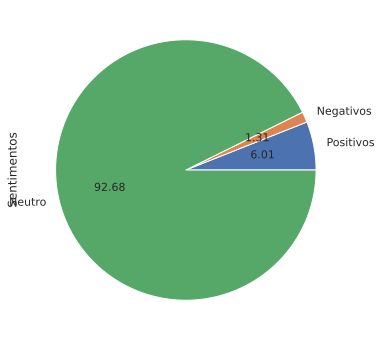

In [ ]:
pie_chart = pd.Series(percents, index=sentiments, name='Sentimentos')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(10, 6));

In [ ]:
display(df.head(10))

id                created_at  ... unnamed: 91 sentiment
0  1409983099652378626  2021-06-29T21:12:21.000Z  ...         NaN         1
1  1410014272776654852  2021-06-29T23:16:14.000Z  ...         NaN         0
2  1409985343135404039  2021-06-29T21:21:16.000Z  ...         NaN         0
3  1409985975401517058  2021-06-29T21:23:47.000Z  ...         NaN         0
4  1409961906606153737  2021-06-29T19:48:09.000Z  ...         NaN         0
5  1409936679046107142  2021-06-29T18:07:54.000Z  ...         NaN         0
6  1409930083326889992  2021-06-29T17:41:41.000Z  ...         NaN         0
7  1409930386151514121  2021-06-29T17:42:53.000Z  ...         NaN         0
8  1409801561262411779  2021-06-29T09:10:59.000Z  ...         NaN         0
9  1409913786069356547  2021-06-29T16:36:56.000Z  ...         NaN         0

[10 rows x 93 columns]

# Twitter Setiments Analisys with NLTK
Training Model

In [ ]:
# NLTK Imports
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# TextBlob Imports
from textblob import TextBlob
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier


In [ ]:
vectorizer = CountVectorizer(analyzer="word")
freq_tweets = vectorizer.fit_transform(wordsPT)
modelo = MultinomialNB()
modelo.fit(freq_tweets,wordsPT_sentiments);

NameError: ignored

In [118]:

#Gets all hashtags.
def get_hashtags(df):
    return [tag['text'] for tag in dftweet['entities']['hashtags']]

#https://gist.github.com/timothyrenner/dd487b9fd8081530509c 


In [ ]:
df.head

In [ ]:
#tratamento campo TEXT 
import re
# Cleaning the text by removing hastags, @'s, URL's.
def CleanTxt(text):
  text = re.sub(r"@(\w+)", ' ', text) # This wil remove any @ mentions
  text = re.sub('@[^\s]+','',text) # This will remove any hashtags (#)
  text = re.sub('https?:\/\/\S+', '', text) # This will remove any URl's
  text = re.sub('RT[\s]+', '', text) # This will remove any RT mentions

  return text

# Cleaning the text
df['text_limpo'] = df['text'].apply(CleanTxt)

# Showing the cleaned text
df['text_limpo']

#df['text','text_limpo']




#https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
#https://medium.com/better-programming/twitter-sentiment-analysis-15d8892c0082
#https://dev.to/nicfoxds/how-to-analyse-clean-text-data-in-python-2hb9
#https://twitter-data-analysis.blogspot.com/2020/08/twitter-data-analysis-part-3-sentiment.html

TypeError: ignored

In [ ]:
#comparando dados campo TEXT e TEXT_LIMPO
df[['id','text','text_limpo']]

id  ...                                         text_limpo
0     1348123015066775554  ...                                   てぃさんおはようございますっ😆✨
1     1348125535495340033  ...                                    てぃさぁぁあんんんん！！！！！
2     1348145276914200576  ...  GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3     1348184655237844992  ...                     てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4     1348187077905563649  ...         喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるといいですね😃😃😃
...                   ...  ...                                                ...
4993  1315506913627561985  ...                              Eu no EARTE kkkkkkkk 
4994  1315074239360389121  ...      earte me fazendo passar raiva em pleno sábado
4995  1314955335296221184  ...    SIM! as atividades do earte que aguardem eu ...
4996  1316051961146478592  ...     em completo desespero e desânimo com com earte
4997  1315812199684808704  ...  eu simplesmente estou ignorando tudo relaciona...

[4998 rows x 3 columns]

In [ ]:
# Print the columns of the dataframe
print(df.columns)

Index(['id', 'tweet_url', 'created_at', 'parsed_created_at',
       'user_screen_name', 'text', 'tweet_type', 'coordinates', 'hashtags',
       'media', 'urls', 'favorite_count', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_or_quote_id',
       'retweet_or_quote_screen_name', 'retweet_or_quote_user_id', 'source',
       'user_id', 'user_created_at', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'text_new', 'hashtag'],
      dtype='object')


In [ ]:
#Filtrando dados TEA
df.user_screen_name 

In [ ]:
# Get all names 
for col_name in df.columns: 
    print(col_name)

id
tweet_url
created_at
parsed_created_at
user_screen_name
text
tweet_type
coordinates
hashtags
media
urls
favorite_count
in_reply_to_screen_name
in_reply_to_status_id
in_reply_to_user_id
lang
place
possibly_sensitive
retweet_count
retweet_or_quote_id
retweet_or_quote_screen_name
retweet_or_quote_user_id
source
user_id
user_created_at
user_default_profile_image
user_description
user_favourites_count
user_followers_count
user_friends_count
user_listed_count
user_location
user_name
user_statuses_count
user_time_zone
user_urls
user_verified
text_new
hashtag


In [ ]:
df.values.tolist()

In [ ]:
print(df['text']) # imprimir somente uma coluna do dataframe

0                             @Tea_earte てぃさんおはようございますっ😆✨
1                              @Tea_earte てぃさぁぁあんんんん！！！！！
2       GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3               @Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4       @Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...
                              ...                        
4993         Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh
4994        earte me fazendo passar raiva em pleno sábado
4995    @Lugusfe SIM! as atividades do earte que aguar...
4996       em completo desespero e desânimo com com earte
4997    eu simplesmente estou ignorando tudo relaciona...
Name: text, Length: 4998, dtype: object


In [ ]:
df[['id','created_at','text']]

id  ...                                               text
0     1348123015066775554  ...                        @Tea_earte てぃさんおはようございますっ😆✨
1     1348125535495340033  ...                         @Tea_earte てぃさぁぁあんんんん！！！！！
2     1348145276914200576  ...  GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3     1348184655237844992  ...          @Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4     1348187077905563649  ...  @Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...
...                   ...  ...                                                ...
4993  1315506913627561985  ...       Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh
4994  1315074239360389121  ...      earte me fazendo passar raiva em pleno sábado
4995  1314955335296221184  ...  @Lugusfe SIM! as atividades do earte que aguar...
4996  1316051961146478592  ...     em completo desespero e desânimo com com earte
4997  1315812199684808704  ...  eu simplesmente estou ignorando tudo relaciona...

[4998 rows x 3 columns]

In [ ]:

#Lets take a look at the users who are posting these tweets:
print("There are {} different users".format(df['user_name'].nunique()))

#https://towardsdatascience.com/visualisation-of-information-from-raw-twitter-data-part-2-11707a65e920

There are 1834 different users


In [ ]:


#Plot these results
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (15,15))
index = np.arange(25)
plt.bar(index, dict_values, edgecolor = 'black', linewidth=1)
plt.xlabel('Most active Users', fontsize = 18)
plt.ylabel('Nº of Tweets', fontsize=20)
plt.xticks(index,dict_keys, fontsize=15, rotation=90)
plt.title('Number of tweets for the most active users', fontsize = 20)
plt.savefig('Tweets_of_active_users.jpg')
plt.show()
#com erro 
#https://towardsdatascience.com/visualisation-of-information-from-raw-twitter-data-part-2-11707a65e920

NameError: ignored

<Figure size 1080x1080 with 0 Axes>

In [ ]:
df1 = pd.DataFrame(df)
df['created_at'] = pd.to_datetime(df['created_at']) # convert to datetime data type
df.sort_values(by='created_at');
df1.created_at



0      2021-01-10 04:22:28+00:00
1      2021-01-10 04:32:29+00:00
2      2021-01-10 05:50:56+00:00
3      2021-01-10 08:27:24+00:00
4      2021-01-10 08:37:02+00:00
                  ...           
4993   2020-10-12 04:17:43+00:00
4994   2020-10-10 23:38:26+00:00
4995   2020-10-10 15:45:57+00:00
4996   2020-10-13 16:23:33+00:00
4997   2020-10-13 00:30:49+00:00
Name: created_at, Length: 4998, dtype: datetime64[ns, UTC]

# Top 5 linguagens tuites

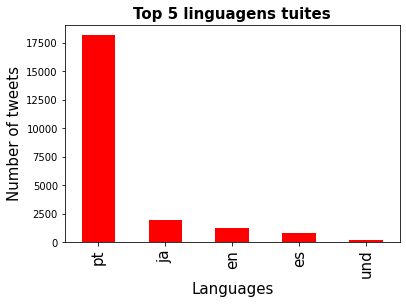

In [ ]:
#top languages

tweets_by_lang = df['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 linguagens tuites', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')



In [ ]:
df.head() 

In [ ]:
def extract_link(tex):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

df.text

0                             @Tea_earte てぃさんおはようございますっ😆✨
1                              @Tea_earte てぃさぁぁあんんんん！！！！！
2       GENTE TA PARCENDO UMA OBRA D EARTE UMA PINTURA...
3               @Tea_earte てぃさんが発音よく言ってるのがしっかり脳内で再生できた（笑）
4       @Tea_earte 喜んでもっと喜んで！！！\r\n闘いで負けても発音の良さでは勝てるとい...
                              ...                        
4993         Eu no EARTE kkkkkkkk https://t.co/X9wxuyI8dh
4994        earte me fazendo passar raiva em pleno sábado
4995    @Lugusfe SIM! as atividades do earte que aguar...
4996       em completo desespero e desânimo com com earte
4997    eu simplesmente estou ignorando tudo relaciona...
Name: text, Length: 4998, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


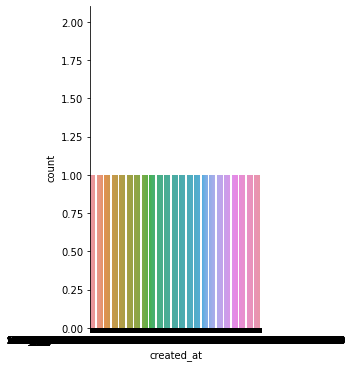

In [ ]:
#grafico 
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

sns.factorplot('created_at', data=df, kind='count')





In [ ]:
#informações do dataframe
#df.info() 

# Número de linhas da coluna ‘Text’:
df.Text.count()

# Removendo os valores duplicados:
df.drop_duplicates(['Text'], inplace=True)

#https://minerandodados.com.br/analise-de-sentimentos-utilizando-dados-do-twitter/

In [ ]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string
import json

import numpy as np 
import pandas as pd 
from time import time
import re
import string
import os
#import emoji
import collections

st_words = set(STOPWORDS)
#enhancing stopword by removing @mentions and shorthands
st_words.update(['que','de','da', 'para', 'https','CO','RT','na','ao','os', 'em','via','amp','place','new','ttot','best','great','top','ht','ysecrettravel','ysecrettravel_'])


wc = WordCloud(height=600,repeat=False,width=1400,max_words=100,stopwords=st_words,colormap='terrain',background_color='Cyan',mode='RGBA').generate(' '.join(df['text_limpo'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Tweets Wordcloud Earte')
plt.axis('off')
plt.show()

#https://www.kaggle.com/overload10/twitter-dataset-eda referencia

KeyError: ignored

In [ ]:
# Estatísticas básicas
# Verificar mínimos e máximos para garantir se estão dentro dos limites esperados
# Verificar intervalo de variação da medida
# Verificar possíveis outliers
df.describe()

# Verificar tipos de dados
df.dtypes


# Verificar nulos
df.info()


# Verificar nulos
pandas.options.mode.use_inf_as_na = True
df.isnull().sum()

#ref https://www.kaggle.com/educfrio/an-lise-explorat-ria-de-dados 
# plotando dados: https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            4998 non-null   int64              
 1   tweet_url                     4998 non-null   object             
 2   created_at                    4998 non-null   datetime64[ns, UTC]
 3   parsed_created_at             4998 non-null   object             
 4   user_screen_name              4998 non-null   object             
 5   text                          4998 non-null   object             
 6   tweet_type                    4998 non-null   object             
 7   coordinates                   0 non-null      float64            
 8   hashtags                      536 non-null    object             
 9   media                         385 non-null    object             
 10  urls                          290 no

NameError: ignored

In [ ]:
#Let’s see if there are any null values present in our dataset:
df.isnull().sum()

id                                 0
tweet_url                          0
created_at                         0
parsed_created_at                  0
user_screen_name                   0
text                               0
tweet_type                         0
coordinates                     4998
hashtags                        4462
media                           4613
urls                            4708
favorite_count                     0
in_reply_to_screen_name         3743
in_reply_to_status_id           3750
in_reply_to_user_id             3743
lang                               0
place                           4910
possibly_sensitive              4329
retweet_count                      0
retweet_or_quote_id             3395
retweet_or_quote_screen_name    3395
retweet_or_quote_user_id        3395
source                             1
user_id                            0
user_created_at                    0
user_default_profile_image         0
user_description                 381
u

**## Analise de dados**



In [ ]:
for index,text in enumerate(df['text']):
  print('Tweet %d:\n'%(index+1),text)

In [ ]:
#teste sentimento 
#from textblob import TextBlob

#iterar imprimindo todos tweets
for i in df.Tweet_text:
    print(df.Tweet_text)


  
import pandas as pd 
from textblob import TextBlob
df=pd.read_csv(r'/content/sample_data/tweet_activity_metrics_TheCoolFanBoi_20181208_20190105_en.csv')


#comment_words=' '
#stopwords=set(STOPWORDS)
print('Tweet   |     Polarity     |     Subjectivity')
for val in df.Tweet_text:
    sentiments=TextBlob(val)
    print('---------------')
    print(val,end='')
    print(' ',end='')
    print(sentiments.polarity,end='')
    print(' |  ',end='')
    print(sentiments.subjectivity)

#Codigo com erro; Corrigir

AttributeError: ignored

In [ ]:
df.head()

id  ... user_verified
0  1348123015066775554  ...         False
1  1348125535495340033  ...         False
2  1348145276914200576  ...         False
3  1348184655237844992  ...         False
4  1348187077905563649  ...         False

[5 rows x 37 columns]

In [ ]:
#lista de 20 top - PALAVRAS

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words=['earte','de','que','do', 'co','https','eu','no', 'pra','com', 'não', 'da', 'me'])
count_matrix = cv.fit_transform(df.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["TOP_WORD"])
word_count["count"] = count_matrix.sum(axis = 0).tolist()[0]
word_count = word_count.sort_values("count", ascending = False).reset_index(drop = True)

word_count[:10]
#FUNCIONA 
#REFERENCIA: https://github.com/vhnegrisoli/analise-exploratoria-dados-python/blob/master/01%20-%20MongoDB%20e%20NoSQL%20com%20Python%2C%20Pandas%2C%20Scikit%20Learn%20e%20API%20Twitter.ipynb




TOP_WORD  count
0  tea_earte    496
1       mais    493
2       2020    485
3         em    465
4         um    449
5      orβit    441
6       esse    411
7        uma    379
8         se    338
9         só    337

In [ ]:

# calculate number of characters in a tweet and save as new column
df['tweet_length']  = np.array([len(tweet) for tweet in df['text']])

print('Average number of characters per tweet:', df['tweet_length'].mean())
print('Average number of characters per reply:', df['tweet_length'][df['in_reply_to_status_id'] != 0].mean())
print('Average number of characters per retweet:', df['tweet_length'][df['retweeted_status_id'] != 0].mean())
print('Average number of characters per mention:', df['tweet_length'][df['mention_to_user_id'] != 0].mean())

#corrigir erro  retweet e mention
#https://www.kaggle.com/leonardoassis/portuguese-tweets-nltk-and-sklearn

Average number of characters per tweet: 89.96458583433373
Average number of characters per reply: 89.96458583433373


KeyError: ignored

text data analysis

In [ ]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    # remove special characters, links from tweets
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    # predict the sentiment of a tweet using textblob
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

# create a new column with the result of the sentiment analysis
df['sentiment'] = np.array([analize_sentiment(tweet) for tweet in df['text']])

# construct lists with classified tweets
pos_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['sentiment'][index] < 0]

# print percentages
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['text'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(df['text'])))

#verificar analise dos percentuais 

TypeError: ignored

time series analysis

In [ ]:
df.head()

In [ ]:
df_time = df.copy()

# set the timestamp column as the index and delete the column
df_time.index = df_time['created_at']
del df_time['created_at']

df_time.head()

In [ ]:
df.head()

In [ ]:
print('Total tweets in 2020:', df_time['2020']['created_at'].count())
#print('Total replies in 2020:', (df_time!=0)['2020']['in_reply_to_status_id'].sum()) # zeros need to be excluded

NameError: ignored

In [ ]:
from textblob import TextBlob

# perform sentiment analysis on each tweet
# -1 < polarity < 1 (negativity vs positivity (sentiment))
# 0 < subjectivity < 1 (factual vs opinion)
for text in df:
    print(df.text)
    analysis = TextBlob(df.text)
    print(analysis.sentiment)
    print("----------")

#    Deu erro. retomar https://ugoproto.github.io/ugo_py_doc/


0       A Comissão de Acompanhamento ao Trabalho/Ensin...
1       Zoom e outras reuniões pela Internet l"Se você...
2       Ensino remoto tá puxado pra todo mundo, né?\nT...
3       RT @ericbrasiln: Ensino remoto tá puxado pra t...
4       Diante dos desafios do nosso tempo, os educado...
                              ...                        
3055    RT @marinhos: Ensino remoto. Mas o que importa...
3056    Ensino remoto. Improvisação, não inovação educ...
3057    A ironia provocada pelo novo coronavírus.\nNa ...
3058    En una semana todos los docentes trabajando te...
3059    É a verdade, incomode a quem incomodar.\nEs la...
Name: text, Length: 3060, dtype: object


TypeError: ignored

In [ ]:
# Frequecy word
#Create List of Lower Case Words from Tweets

from collections import Counter

for item in df[text]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()




TypeError: ignored

In [ ]:
from collections import Counter

top=Counter([item for sublist in df['text'] for item in sublist])
df=pd.DataFrame(top.most_common(20))
df=df.iloc[1:,:]
df.columns=['Common_words','count']
df.style.background_gradient(cmap='OrRd')

In [ ]:
# most common words in twitter dataset

# Machine Learning imports
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
#from nltk.stem.wordnet import WordNetLemmatizerLoad #training dataset to Pandas and preview the top rows.
import matplotlib.pyplot as plt

all_words = []
for line in list(df['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log of all words 
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

# Está funcionando. Falta inserir as stopWord
# https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


AttributeError: ignored

In [ ]:
from collections import Counter

for item in df['text']:
    c = Counter(item)
    print (c.most_common()[:10]) # top 10, "\n")

[(' ', 35), ('o', 30), ('a', 29), ('e', 25), ('n', 16), ('s', 15), ('m', 12), ('i', 12), ('t', 12), ('r', 12)]
[(' ', 38), ('e', 25), ('o', 24), ('t', 14), ('i', 14), ('s', 13), ('a', 12), ('n', 12), ('c', 10), ('u', 9)]
[(' ', 34), ('o', 25), ('e', 22), ('n', 20), ('t', 20), ('i', 19), ('a', 18), ('s', 14), ('d', 12), ('r', 10)]
[(' ', 21), ('o', 16), ('a', 11), ('n', 9), ('i', 8), ('t', 8), ('d', 7), ('e', 6), ('r', 6), ('l', 5)]
[(' ', 35), ('o', 25), ('s', 24), ('a', 22), ('e', 22), ('n', 16), ('t', 15), ('i', 14), ('r', 12), ('c', 8)]
[(' ', 22), ('o', 15), ('e', 14), ('s', 13), ('a', 11), ('n', 9), ('t', 8), ('r', 7), ('d', 7), ('i', 6)]
[(' ', 22), ('o', 15), ('e', 14), ('s', 13), ('a', 11), ('n', 9), ('t', 8), ('r', 7), ('d', 7), ('i', 6)]
[(' ', 21), ('o', 16), ('a', 11), ('n', 9), ('i', 8), ('t', 8), ('d', 7), ('e', 6), ('r', 6), ('l', 5)]
[('n', 18), ('o', 15), ('a', 14), (' ', 11), ('e', 11), ('c', 10), ('t', 10), ('i', 9), ('u', 8), ('l', 7)]
[('o', 13), ('a', 12), ('n', 1

TypeError: ignored

In [ ]:
# 10 most repeated tweets
df.groupby(['text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)
#https://ourcodingclub.github.io/tutorials/topic-modelling-python/

text  counts
1578  RT @ericbrasiln: Ensino remoto tá puxado pra t...     207
1785  RT @walmeszeviani: É com satisfação que divulg...      93
1778  RT @vidadeservidor_: Um desabafo que resume a ...      59
1758  RT @ufrj: A UFRJ, por meio do seu Conselho de ...      36
1753  RT @ubesoficial: O nome disso é desigualdade s...      14
1760  RT @ufrj: UFRJ, Uerj, UFF, Unirio, UFRRJ, Uenf...      14
1429  RT @AlencarBraga13: 📒 O professor de Geografia...      14
1535  RT @agenciapublica: Mais de 5 milhões de aluno...      13
1511  RT @SinasefeIfes: Professores, técnicos e alun...      12
1551  RT @bterralivre: No #Antinomia de hj, conversa...      11

In [ ]:
# Get the data
import matplotlib.pyplot as plt

tweet_count = len(df)
favorite_count = df['favorite_count'].sum()
retweet_count = df['retweet_count'].sum()

# Print it out
print('Number of tweets: ' + str(tweet_count))
print('Total number of likes: ' + str(favorite_count))
print('Total number of retweets: '+ str(retweet_count))
# Draw a nice plot of the likes and retweets
df.plot.bar(subplots=True, figsize=(10,6),y=
   ['favorite_count','retweet_count'])
plt.show()

KeyError: ignored

In [ ]:
from collections import Counter

top=Counter([item for sublist in df['text'] for item in sublist])
df=pd.DataFrame(top.most_common(20))
df=df.iloc[1:,:]
df.columns=['Common_words','count']
df.style.background_gradient(cmap='OrRd')

TypeError: ignored

In [ ]:
# Stopwords em português:

import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')

stopwords[:10]
[u'de', u'a', u'o', u'que', u'e', u'do', u'da', u'em', u'um', u'para']

len(stopwords)
203

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


203

In [ ]:
# Inspecting the distribution of numerical values
df.describe()

id  ...  Unnamed: 91
count  3.060000e+03  ...          0.0
mean   1.337991e+18  ...          NaN
std    5.006019e+16  ...          NaN
min    1.241323e+18  ...          NaN
25%    1.293934e+18  ...          NaN
50%    1.329549e+18  ...          NaN
75%    1.383872e+18  ...          NaN
max    1.416145e+18  ...          NaN

[8 rows x 32 columns]

In [ ]:
# Generating Word Frequency
#Let's first generate a frequency table of all the words present in all the tweets combined.

def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(text.str)
#https://github.com/shivamsingh96/Natural_Language_Processing/blob/master/Exploring%20Text%20Data.ipynb


NameError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Instanciando o objeto
vectorizer = TfidfVectorizer()
#construindo o vetorizador dos dados
vectorizer.fit(df['text']) 

print(vectorizer.vocabulary_)

print(vectorizer.idf_)



ValueError: ignored

# #Top 15 words do dataset

In [122]:
import numpy as np


In [123]:
import nltk 
nltk.download('stopwords')
nltk_stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [124]:
print(stopwords)

<WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>


In [132]:
str(stopwords.words('portuguese')[:50])

"['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem']"

In [133]:
stop_words= ['em','sao','ao','de','da','do','para','c','kg','un',
              'ml','pct','und','das','no','ou','pc','gr','pt','cm',
              'vd','com','sem','gfa','jg','la','1','2','3','4','5',
              '6','7','8','9','0','a','b','c','d','e','lt','f','g',
              'h','i','j','k','l','m','n','o','p','q','r','s','t',
              'u','v','x','w','y','z']

In [134]:
frase = 'Texto exemplo tokenização'
nltk.word_tokenize(frase)
 
['Texto', 'exemplo', 'tokenização']

['Texto', 'exemplo', 'tokenização']

In [135]:
cvt = CountVectorizer(strip_accents='ascii', 
                      lowercase=True, 
                      stop_words=stop_words)

In [136]:
X_cvt = cvt.fit_transform(df['text'])

In [138]:
df.isna().sum()

id                           0
created_at                   6
text                         0
attachments.media         2065
attachments.media_keys    2065
                          ... 
withheld.country_codes    3060
__twarc.retrieved_at         0
__twarc.url                  0
__twarc.version              0
Unnamed: 91               3060
Length: 92, dtype: int64

In [144]:
#converter data em formato Date
#https://www.marsja.se/pandas-convert-column-to-datetime/
df['created_at'] = pd.to_datetime(df['created_at'])

In [149]:
df['created_at'].min()

Timestamp('2020-03-21 11:15:29+0000', tz='UTC')

In [148]:

df['created_at'].max()

Timestamp('2021-07-16 21:19:27+0000', tz='UTC')

In [151]:
import nltk
from nltk.corpus import stopwords
pt_br_stop_words = set(stopwords.words('portuguese'))
print('Portuguese Stopwords')
print(pt_br_stop_words)


Portuguese Stopwords
{'só', 'e', 'nem', 'houverão', 'hei', 'tive', 'estiverem', 'tiver', 'fosse', 'nas', 'teríamos', 'foram', 'são', 'houver', 'fora', 'delas', 'houvéramos', 'hajamos', 'estiveram', 'houveram', 'entre', 'da', 'tivessem', 'não', 'estes', 'seríamos', 'tém', 'tinham', 'ou', 'formos', 'somos', 'aos', 'me', 'estou', 'nosso', 'for', 'está', 'tivéramos', 'o', 'em', 'teremos', 'serei', 'ela', 'tiveram', 'estamos', 'fôramos', 'pelos', 'estivera', 'temos', 'uma', 'houveríamos', 'era', 'sejam', 'aquela', 'haja', 'tinha', 'estive', 'esteve', 'dela', 'na', 'pelas', 'seria', 'fôssemos', 'estavam', 'lhes', 'teria', 'se', 'nossas', 'tivemos', 'elas', 'depois', 'aqueles', 'tivéssemos', 'estivéramos', 'sem', 'mais', 'houverem', 'no', 'estávamos', 'às', 'tu', 'lhe', 'nós', 'aquilo', 'tenha', 'num', 'como', 'houveremos', 'essa', 'houveria', 'nossos', 'isto', 'fui', 'mesmo', 'tiverem', 'estivermos', 'também', 'é', 'estivéssemos', 'suas', 'tua', 'éramos', 'as', 'te', 'hão', 'houverá', 'teve'

In [169]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

df['text'] = df['text'].apply(str)

#df['text'] = df['text'].astype(str)

texto = df['text']
word_tokens = word_tokenize[df.text]
text_after_stopword = [w for w in word_tokens if not w in pt_br_stop_words]
print(text_after_stopword)

TypeError: ignored

In [ ]:
#https://datatofish.com/integers-to-strings-dataframe/

In [171]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

len(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


204

In [186]:
type(frequency)

pandas.core.frame.DataFrame

In [187]:
frequency

word  freq
0             https  2070
1      ensinoremoto  1909
2                rt  1096
3            ensino   987
4               que   922
...             ...   ...
10497    cualquiera     1
10498       moleste     1
10499           nit     1
10500         truth     1
10501    dx1ifawafc     1

[10502 rows x 2 columns]

In [207]:
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

Text(0.5, 1.0, 'Palavras que mais aparecem - Top 15')

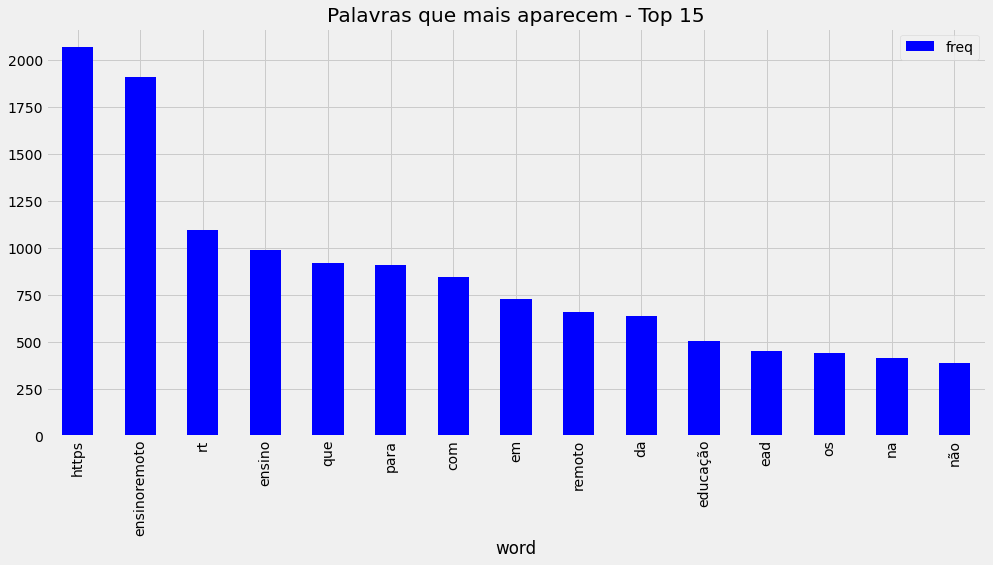

In [208]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
#stop_words = nltk.corpus.stopwords.words('portuguese') +\
#             nltk.corpus.stopwords.words('english')
#cv = CountVectorizer(stop_words = 'english')
stopwords = stopwords.words('portuguese')
words = cv.fit_transform(df.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(15).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Palavras que mais aparecem - Top 15")

Text(0.5, 0.98, 'Top 15 Words')

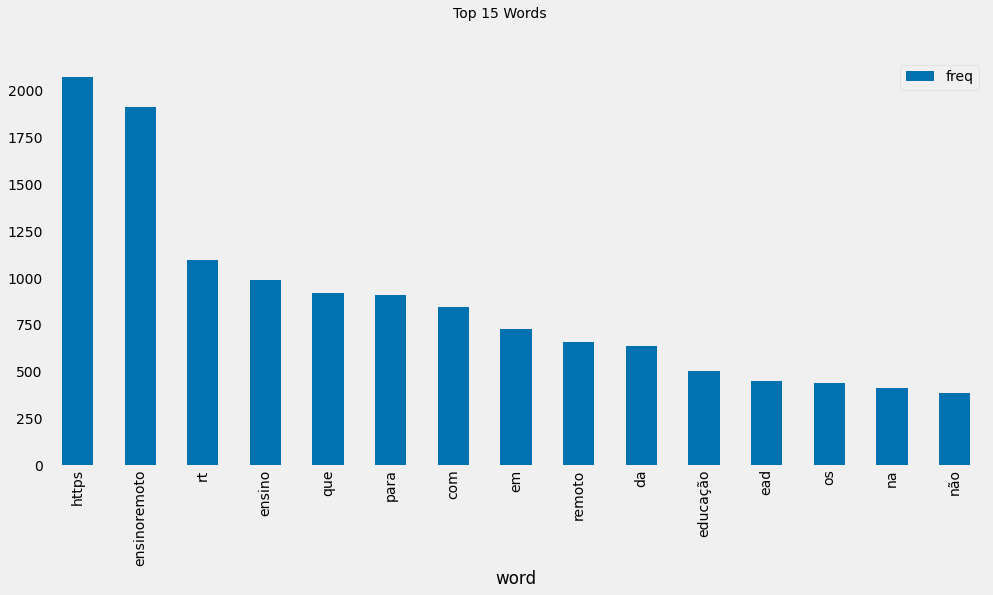

In [197]:
#word_count = pd.DataFrame(cv.get_feature_names(), columns=["TOP_WORD"])
frequency.head(15).plot(x='word', y='freq', kind='bar', figsize=(15, 7))
#fig, ax = plt.subplots(figsize=(12, 8))
#plt.tight_layout()
plt.grid(False)
plt.suptitle('Top 15 Words', fontsize=14)

In [180]:
#lista de 20 top - PALAVRAS

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words=['rt','earte','de','que','do', 'co','https','eu','no', 'pra','com', 'da', 'me', 
'para', 'em', 'os', 'na','a',
])
#stopwords na linha de cima implementar 
count_matrix = cv.fit_transform(df.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["TOP_WORD"])
word_count["count"] = count_matrix.sum(axis = 0).tolist()[0]
word_count = word_count.sort_values("count", ascending = False).reset_index(drop = True)

word_count[:15]
#FUNCIONA 
#REFERENCIA: https://github.com/vhnegrisoli/analise-exploratoria-dados-python/blob/master/01%20-%20MongoDB%20e%20NoSQL%20com%20Python%2C%20Pandas%2C%20Scikit%20Learn%20e%20API%20Twitter.ipynb

TOP_WORD  count
0   ensinoremoto   1909
1         ensino    987
2         remoto    659
3       educação    507
4            ead    450
5             as    399
6            não    385
7         nhttps    358
8             um    344
9       pandemia    312
10         sobre    311
11          mais    308
12        alunos    302
13           uma    290
14         aulas    279

In [179]:
#lista de 20 top - PALAVRAS
# Top 25 users

#import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

word_count["count"] = count_matrix.sum(axis = 0).tolist()[0]
users_count = users_count[:10,]
plt.figure(figsize=(16,8))
sns.barplot(TOP_WORD, count, alpha=0.8)
plt.title('Top 10 usuários')
plt.ylabel('Number de ocorrências', fontsize=14)
plt.xlabel('Usuários', fontsize=14)
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

NameError: ignored

<Figure size 1152x576 with 0 Axes>

# Map of Tweets

In [ ]:
# https://github.com/lucasfranklinsilva/Analise-de-Sentimentos

In [ ]:
df.columns

Index(['id', 'created_at', 'text', 'attachments.media',
       'attachments.media_keys', 'attachments.poll.duration_minutes',
       'attachments.poll.end_datetime', 'attachments.poll.id',
       'attachments.poll.options', 'attachments.poll.voting_status',
       'attachments.poll_ids', 'author.id', 'author.created_at',
       'author.username', 'author.name', 'author.description',
       'author.entities.description.cashtags',
       'author.entities.description.hashtags',
       'author.entities.description.mentions',
       'author.entities.description.urls', 'author.entities.url.urls',
       'author.location', 'author.pinned_tweet_id', 'author.profile_image_url',
       'author.protected', 'author.public_metrics.followers_count',
       'author.public_metrics.following_count',
       'author.public_metrics.listed_count',
       'author.public_metrics.tweet_count', 'author.url', 'author.verified',
       'author.withheld.scope', 'author.withheld.copyright',
       'author.withheld

In [120]:
#MAP
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from geopy.geocoders import Nominatim

import numpy as np 

In [121]:
geolocator = Nominatim(user_agent="TweeterSentiments")

latitude = []
longitude = []

for df.author.location in df['author.location']:
    try:
        location = geolocator.geocode(author.location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

AttributeError: ignored

In [ ]:

(latitude)

[]

In [ ]:
coordenadas = np.column_stack((latitude, longitude))

mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=4)

mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save('lula-bolsonaro.html')
mapa

In [ ]:
locs = df['author.location'].value_counts()
locs[locs>10]

São Paulo, Brasil                            190
Brasil                                       179
Curitiba, Brasil                              93
Rio de Janeiro                                80
Campus Aracaju                                77
curitiba                                      60
Araçatuba, Brasil                             56
São Paulo                                     51
Rio de Janeiro, Brasil                        49
Brazil                                        49
Here, there and everywhere.                   46
Natal, Brasil                                 41
Belo Horizonte - Brasil                       41
Itapetinga, Jequié e Vitória da Conquista     29
Espírito Santo                                28
Vila Velha, Brasil                            25
Porto Velho, Brasil                           23
São João dos Patos, Brasil                    19
São Paulo - Brasil                            19
Porto Alegre, Brasil                          19
Rio Grande do Sul, B

In [ ]:
df['author.location'] =  df['author.location'].apply(lambda x: mapping[x] if x in mapping.keys() else x )
# https://github.com/cnstlungu/incubator/blob/master/Python/Exploring%20Twitter%20Data%20using%20Python/Exploring%20Twitter%20Data%20using%20Python%20.ipynb
#https://medium.com/analytics-vidhya/exploring-twitter-data-using-python-part-iii-analyzing-the-data-e883aa340dff

## Dicas

Codigos que poderão ser implementados para melhorar esta analise ou futuras**

nRowsRead = 1000 # specify 'None' if want to read whole file
Tweets.csv has 14640 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('../input/Tweets.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Tweets.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

 importar dataset com encoding 
full_df = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv', header = None, names = columns,  encoding='latin-1')

https://www.kaggle.com/parthsharma5795/comprehensive-twitter-airline-sentiment-analysis 
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


f.rename(columns={'tfr': 'TFR'}) #renomear coluna



*   Item da lista

*   Item da lista
*   Item da lista


*   Item da lista



# Referências consultadas



https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/

https://necromuralist.github.io/Neurotic-Networking/posts/nlp/twitter-word-frequencies/

https://marcobonzanini.com/2015/03/17/mining-twitter-data-with-python-part-3-term-frequencies/

https://advertools.readthedocs.io/en/master/advertools.word_frequency.html

https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

https://minerandodados.com.br/analise-de-sentimentos-twitter-como-fazer/base-dados-scripts https://www.oreilly.com/library/view/mining-the-social/9781491973547/ch01.html
https://dev.to/mchdax/coletando-dados-do-twitter-com-python-1c7k
https://www.kaggle.com/amar09/sentiment-analysis-on-scrapped-tweets  LER

https://www.kaggle.com/thiagopanini/e-commerce-sentiment-analysis-eda-viz-nlp 

https://www.kaggle.com/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model muito bom

https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb

